In [1]:
require(dplyr)
require(ggpubr)
require(data.table)
library(tidyverse)
options(warn = -1)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggpubr

Loading required package: ggplot2

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats

In [2]:
library(SingleCellExperiment)


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

**Parameters**

In [3]:
base_path <- "/scratch_isilon/groups/singlecell/shared/projects/Inflammation-PBMCs-Atlas/03_downstream_analysis/07_gene_regulatory_network/"

In [4]:
# Inputs
inputpath_perez2022_level1 <- "data/STAT1_SP1_perez2022_level1.csv"
inputpath_scgt00_level1 <- "data/STAT1_SP1_scgt00_level1.csv"
inputpath_perez2022 <- "data/STAT1_SP1_perez2022.csv"
inputpath_scgt00 <- "data/STAT1_SP1_scgt00.csv"
inputpath_sle_metadata <- "/scratch_isilon/groups/singlecell/shared/projects/Inflammation-PBMCs-Atlas/03_downstream_analysis/06_inflammation_signatures/results/SLE_metadata.csv"

In [5]:
outputpath <- "results/test_revision_20250402/"

In [6]:
# Palette
color_palette_path <- source(paste0(base_path, "data/colors_palette.R"))

# Load data

**adata**

In [7]:
library(zellkonverter)
h5ad_path <- file.path(base_path, "results/00_PB_adata_with_SPECTRAresults.h5ad")
sce <- readH5AD(h5ad_path)
sce

Registered S3 method overwritten by 'zellkonverter':
  method                                             from      
  py_to_r.pandas.core.arrays.categorical.Categorical reticulate



class: SingleCellExperiment 
dim: 8253 10313 
metadata(4): Factor_markers Gene_Weights Gene_selection_parameters
  Input_signatures
assays(1): X
rownames(8253): ENSG00000000003 ENSG00000000457 ... ENSG00000280789
  ENSG00000282608
rowData names(5): hgnc_id symbol locus_group HUGO_status
  SPECTRA_selected_genes
colnames(10313): Perez2022_1368_T0_B-0 Perez2022_1368_T0_DC-0 ...
  Terekhova2023_B17_T0_Cycling_cells-1
  Terekhova2023_B17_T0_Progenitors-1
colData names(9): studyID sampleID ... psbulk_n_cells diseaseGroup
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [8]:
assay(sce, "lognorm") <- log1p(assay(sce, "X"))

**ulm results**

In [9]:
# Arguments
spectra_of_interest <- c("SPECTRA_110", "SPECTRA_13", "SPECTRA_130", "SPECTRA_24",
                         "SPECTRA_34", "SPECTRA_46", "SPECTRA_56", "SPECTRA_71",
                         "SPECTRA_86", "SPECTRA_98")

In [10]:
inputpath <- file.path(base_path, "data/toplot_tfs_lmm.rds")
toplot <- readRDS(inputpath)

In [11]:
xx <-
    toplot %>%
    tidyr::pivot_wider(names_from = "annot", values_from = "z") %>% # values_from = "z" if object is toplot_tfs_lmm.rds
    tibble::column_to_rownames("target") %>%
    select(contains(spectra_of_interest)) %>%
    filter(!if_all(everything(), is.na))

In [12]:
dim(xx)

[1] 50 69

In [13]:
xx

,SPECTRA_110:STAT1:flu:T_CD8_NonNaive,SPECTRA_110:SP1:flu:T_CD8_NonNaive,SPECTRA_110:STAT1:SLE:T_CD8_NonNaive,SPECTRA_110:SP1:SLE:T_CD8_NonNaive,SPECTRA_110:STAT1:COVID:T_CD8_NonNaive,SPECTRA_110:STAT1:sepsis:T_CD8_NonNaive,SPECTRA_110:SP1:sepsis:T_CD8_NonNaive,SPECTRA_110:SP1:HNSCC:T_CD8_NonNaive,SPECTRA_110:SP1:COPD:T_CD8_NonNaive,SPECTRA_110:STAT1:COPD:T_CD8_NonNaive,⋯,SPECTRA_56:STAT1:BRCA:Plasma,SPECTRA_71:SP1:flu:T_CD4_Naive,SPECTRA_71:SP1:SLE:T_CD4_Naive,SPECTRA_71:SP1:COPD:T_CD4_Naive,SPECTRA_71:SP1:HNSCC:T_CD4_Naive,SPECTRA_71:SP1:UC:T_CD4_Naive,SPECTRA_98:STAT1:flu:T_CD8_Naive,SPECTRA_98:STAT1:SLE:T_CD8_Naive,SPECTRA_98:STAT1:sepsis:T_CD8_Naive,SPECTRA_98:STAT1:COVID:T_CD8_Naive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OAS1,8.870,8.870,11.342,11.342,3.791,3.259,3.259,0.004,-0.853,-0.853,⋯,0.961,8.597,11.318,-1.731,0.883,0.268,8.369,10.775,2.399,3.776
IFIT3,4.980,NA,1.294,NA,2.276,0.645,NA,NA,NA,-0.046,⋯,0.695,NA,NA,NA,NA,NA,8.774,8.495,3.073,3.843
IFIT2,1.385,NA,-0.014,NA,1.164,0.163,NA,NA,NA,0.014,⋯,NA,NA,NA,NA,NA,NA,6.371,6.559,0.210,3.232
IFI6,9.309,NA,13.140,NA,5.071,3.046,NA,NA,NA,-0.475,⋯,0.940,NA,NA,NA,NA,NA,7.946,13.588,1.556,4.803
MX1,8.854,NA,11.655,NA,7.590,2.278,NA,NA,NA,-1.514,⋯,2.394,NA,NA,NA,NA,NA,8.052,11.531,2.057,NA
ADAR,0.978,NA,5.106,NA,-0.109,0.577,NA,NA,NA,-2.158,⋯,2.171,NA,NA,NA,NA,NA,1.527,5.931,-0.012,0.584
IFI27,3.270,NA,9.188,NA,3.776,0.449,NA,NA,NA,-0.349,⋯,0.848,NA,NA,NA,NA,NA,2.508,9.355,0.428,3.180
ISG20,5.352,5.352,4.053,4.053,2.996,1.111,1.111,2.528,-0.589,-0.589,⋯,0.893,5.178,7.321,0.626,1.026,2.392,4.771,6.147,2.927,1.579
IFIT1,6.555,NA,1.686,NA,2.208,0.993,NA,NA,NA,-0.318,⋯,0.683,NA,NA,NA,NA,NA,7.431,8.174,1.277,2.216


In [14]:
# Define output directory and file path
output_dir <- file.path(base_path, "data/SP1_STAT1_lmm")
output_file <- file.path(output_dir, "xx.csv")

# Create directory if it doesn't exist
if (!dir.exists(output_dir)) {
  dir.create(output_dir, recursive = TRUE)
}

# Write xx to CSV
write.csv(xx, output_file, row.names = TRUE)

# Confirmation message
cat("File saved to:", output_file, "\n")

File saved to: /scratch_isilon/groups/singlecell/shared/projects/Inflammation-PBMCs-Atlas/03_downstream_analysis/07_gene_regulatory_network//data/SP1_STAT1_lmm/xx.csv 


**tf-activities**

In [15]:
# Define the file path
collectri_file <- file.path(base_path, "results", "collectri_inflammation_enrichment_lmm.csv")

# Read CSV with first column as rownames
collectri_results <- read.csv(collectri_file, row.names = 1, stringsAsFactors = FALSE)

# Preview the result
head(collectri_results)

,cell_type,tf,activity,pval,SPECTRA,disease
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
0,B,AP1,-1.547955,0.121671475,SPECTRA_0,asthma
1,Cycling_cells,AP1,-3.092650,0.001990404,SPECTRA_0,asthma
2,DC,AP1,-2.170470,0.029999649,SPECTRA_0,asthma
3,ILC,AP1,-1.893922,0.058270312,SPECTRA_0,asthma
4,Mono,AP1,-1.838944,0.065959291,SPECTRA_0,asthma
5,Plasma,AP1,-1.233620,0.217379748,SPECTRA_0,asthma


**t-statistic Annotations**

In [16]:
col_annot <- data.frame(
    tf = as.factor(sapply(strsplit(names(xx), ":"), "[", 2)),
    disease = as.factor(sapply(strsplit(names(xx), ":"), "[", 3)),
#        SPECTRA = as.factor(sapply(strsplit(names(xx), ":"), "[", 1)),
    cell_type = as.factor(sapply(strsplit(names(xx), ":"), "[", 4)),
    row.names = names(xx)
) %>%
arrange(cell_type, tf, disease)

# Colors
my_colour_annot <- list(
    tf = tfs_colors[names(tfs_colors) %in% levels(col_annot$tf)],
    disease = disease_colors[names(disease_colors) %in% levels(col_annot$disease)],
    cell_type = cell_colors[names(cell_colors) %in% levels(col_annot$cell_type)]
)

my_breaks <- c(seq(-10, 0, length.out=ceiling(palette_length/2) + 1),
            seq(0.05, 15, length.out=floor(palette_length/2)))

In [17]:
my_colour_annot

$tf
      SP1     STAT1 
"#843c39" "#9467bd" 

$disease
       RA        PS       PSA        CD        UC       SLE      COPD cirrhosis 
"#264653" "#287271" "#2a9d8f" "#e76f51" "#e9c46a" "#941c2f" "#c05299" "#973aa8" 
   sepsis       HIV     COVID       flu      BRCA       NPC     HNSCC       CRC 
"#ef233c" "#e7ecef" "#6096ba" "#274c77" "#fff75e" "#fdb833" "#d9981a" "#9e7524" 

$cell_type
        Plasma            pDC             DC           Mono    T_CD4_Naive 
     "#025566"      "#a7c957"      "#6a994e"      "#386641"      "#fff3b0" 
   T_CD8_Naive T_CD8_NonNaive            ILC 
     "#9e2a2b"      "#540b0e"      "#67253a"

In [18]:
cell_type_order <- c("T_CD8_Naive","Plasma", "pDC", "DC", "Mono", "T_CD4_Naive", "T_CD8_NonNaive", "ILC")
tf_order <- c("STAT1", "SP1")
disease_order <- c(
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

# Convert columns to factors with specified levels
df <- col_annot %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order),
    tf = factor(tf, levels = tf_order),
    disease = factor(disease, levels = disease_order)
  )

# Order the data frame by cell_type, tf, and disease
ordered_df <- df %>%
  arrange(cell_type, tf, disease)

In [19]:
tf_list <- split(ordered_df, ordered_df$tf)

# Plot TF activities

In [21]:
# Step 1: Create the matching column in collectri_results
collectri_results <- collectri_results %>%
  mutate(
    match_id = paste(SPECTRA, tf, disease, cell_type, sep = ":")
  )

# Step 2: Extract tstatistics column names
tstat_ids <- colnames(xx)

# Step 3: Subset collectri_results to matching combinations
collectri_matched <- collectri_results %>%
  filter(match_id %in% tstat_ids)

# Preview the result
head(collectri_matched)

,cell_type,tf,activity,pval,SPECTRA,disease,match_id
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Mono,SP1,3.328630,0.0008765658,SPECTRA_46,RA,SPECTRA_46:SP1:RA:Mono
2,Mono,STAT1,2.735409,0.0062435954,SPECTRA_46,RA,SPECTRA_46:STAT1:RA:Mono
3,pDC,STAT1,2.059500,0.0394776246,SPECTRA_130,PS,SPECTRA_130:STAT1:PS:pDC
4,Mono,SP1,2.535898,0.0112342171,SPECTRA_46,COPD,SPECTRA_46:SP1:COPD:Mono
5,ILC,SP1,3.511353,0.0004482150,SPECTRA_34,COPD,SPECTRA_34:SP1:COPD:ILC
6,T_CD8_NonNaive,SP1,2.602969,0.0092585764,SPECTRA_110,COPD,SPECTRA_110:SP1:COPD:T_CD8_NonNaive


In [22]:
library(dplyr)

# --- Define cell type and disease orders for each TF ---
cell_type_order_STAT1 <- c("Mono", "T_CD8_Naive", "T_CD8_NonNaive", "pDC", "DC", "Plasma")
cell_type_order_SP1 <- c("Mono", "T_CD8_NonNaive", "T_CD4_Naive", "ILC")

disease_order <- c(
  "SLE", "flu", "RA", "PS", "PSA", "CD", "UC", "MS",
  "asthma", "COPD", "cirrhosis", "sepsis", "HIV", "HBV", "COVID",
  "BRCA", "NPC", "HNSCC", "CRC"
)

# --- Subset and order STAT1 results ---
stat1_df <- collectri_matched %>%
  filter(tf == "STAT1") %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order_STAT1),
    disease = factor(disease, levels = disease_order)
  ) %>%
  arrange(cell_type, disease)

# --- Subset and order SP1 results ---
sp1_df <- collectri_matched %>%
  filter(tf == "SP1") %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order_SP1),
    disease = factor(disease, levels = disease_order)
  ) %>%
  arrange(cell_type, disease)

tf_acts_dfs <- list(STAT1 = stat1_df, SP1 = sp1_df)

# Generate heatmaps

## STAT1 

In [50]:
stat1_targets_order <- c('IFI27', 'IFI6', 'MX1', 'ISG15',  'IFITM1', 'OAS1', "ISG20", "ADAR", "IFIT3","IFIT1",
'IFIT2','VIM',  'S100A10', 'PRF1',
                  'UPP1', 'TIMP1', 'LGALS3', 'LAP3', 'LY96', 'CD86', 'FGL2', 'FOS')

In [51]:
tf_name <- "STAT1"
tf_df <- tf_list[[tf_name]]

cell_type_order <- c("Mono", "T_CD8_Naive","T_CD8_NonNaive","pDC", "DC","Plasma")
tf_order <- c("STAT1", "SP1")
disease_order <- c(
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

# Convert columns to factors with specified levels
tf_df <- tf_df %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order),
    tf = factor(tf, levels = tf_order),
    disease = factor(disease, levels = disease_order)
  )

# Order the data frame by cell_type, tf, and disease
tf_df <- tf_df %>%
  arrange(tf, cell_type, disease)

tf_xx <-   xx[stat1_targets_order, rownames(tf_df)]
tf_xx <- tf_xx[rowSums(is.na(tf_xx)) != ncol(tf_xx), ]

### TF activity

In [52]:
tf_name = "STAT1"
df = tf_acts_dfs[[tf_name]]
head(df)

,cell_type,tf,activity,pval,SPECTRA,disease,match_id
,<fct>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<chr>
1,Mono,STAT1,11.651753,3.937415e-31,SPECTRA_46,SLE,SPECTRA_46:STAT1:SLE:Mono
2,Mono,STAT1,9.519055,2.249366e-21,SPECTRA_46,flu,SPECTRA_46:STAT1:flu:Mono
3,Mono,STAT1,2.735409,6.243595e-03,SPECTRA_46,RA,SPECTRA_46:STAT1:RA:Mono
4,Mono,STAT1,2.709199,6.758517e-03,SPECTRA_46,UC,SPECTRA_46:STAT1:UC:Mono
5,Mono,STAT1,3.312617,9.282522e-04,SPECTRA_46,cirrhosis,SPECTRA_46:STAT1:cirrhosis:Mono
6,Mono,STAT1,2.992466,2.775527e-03,SPECTRA_46,sepsis,SPECTRA_46:STAT1:sepsis:Mono


In [53]:
df_matrix <- setNames(as.data.frame(t(df$activity)), df$match_id)
rownames(df_matrix) <- paste0(tf_name, "_activity")
df_matrix

,SPECTRA_46:STAT1:SLE:Mono,SPECTRA_46:STAT1:flu:Mono,SPECTRA_46:STAT1:RA:Mono,SPECTRA_46:STAT1:UC:Mono,SPECTRA_46:STAT1:cirrhosis:Mono,SPECTRA_46:STAT1:sepsis:Mono,SPECTRA_46:STAT1:COVID:Mono,SPECTRA_46:STAT1:NPC:Mono,SPECTRA_46:STAT1:HNSCC:Mono,SPECTRA_98:STAT1:SLE:T_CD8_Naive,⋯,SPECTRA_24:STAT1:COVID:DC,SPECTRA_24:STAT1:BRCA:DC,SPECTRA_24:STAT1:NPC:DC,SPECTRA_24:STAT1:HNSCC:DC,SPECTRA_24:STAT1:CRC:DC,SPECTRA_56:STAT1:SLE:Plasma,SPECTRA_56:STAT1:flu:Plasma,SPECTRA_56:STAT1:BRCA:Plasma,SPECTRA_56:STAT1:HNSCC:Plasma,SPECTRA_56:STAT1:CRC:Plasma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STAT1_activity,11.65175,9.519055,2.735409,2.709199,3.312617,2.992466,4.149783,3.468798,3.614728,8.398349,⋯,2.598849,4.634253,3.789213,2.904266,2.610485,14.95328,14.10329,2.095572,5.110986,2.505245


In [54]:
figure_path <- paste0(outputpath, tf_name, "_activity.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    df_matrix,
    border_color = NA,
    na_col = "white",
    color = hcl.colors(50, "BluYl"),
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0(tf_name, " activity accross celltypes and diseases"),     
    #gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(9, 13, 20, 30, 38)
    )
print(a)
dev.off()

pdf 
  4

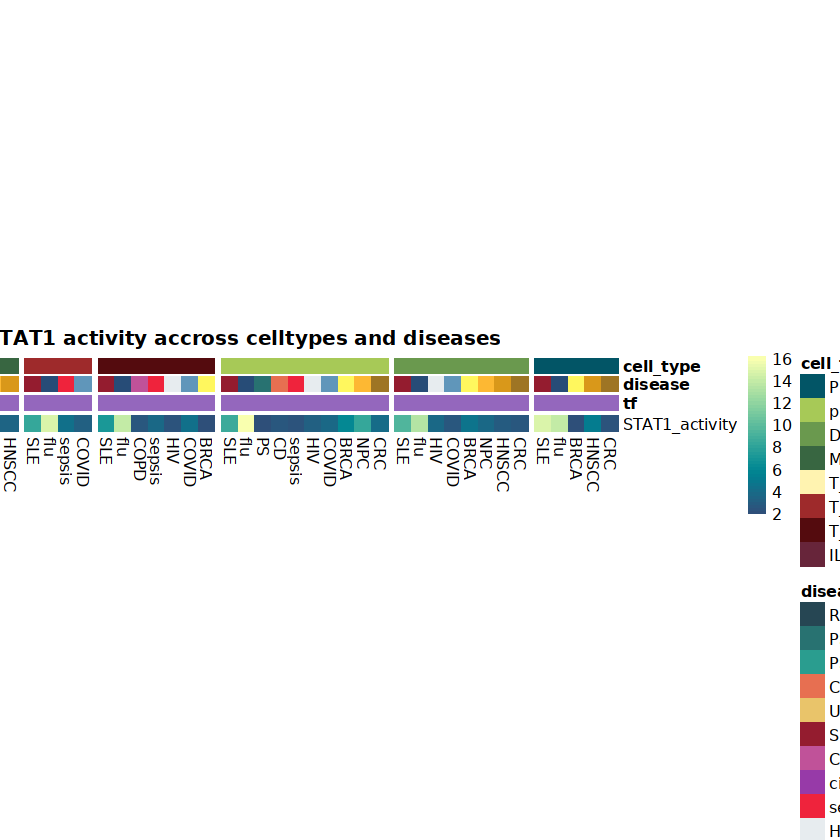

In [55]:
print(a)

In [56]:
# Extract cell types from column names (last part after colon)
col_cell_types <- sapply(strsplit(colnames(df_matrix), ":"), tail, 1)
unique_cell_types <- unique(col_cell_types)

# Initialize output (same shape)
df_scaled <- df_matrix

# Loop over each cell type
for (ct in unique_cell_types) {
  cols_in_ct <- which(col_cell_types == ct)
  values <- as.numeric(df_matrix[1, cols_in_ct])
  
  # Min-max scale within the cell type
  rng <- range(values, na.rm = TRUE)
  if (diff(rng) > 0) {
    df_scaled[1, cols_in_ct] <- (values - rng[1]) / diff(rng)
  } else {
    df_scaled[1, cols_in_ct] <- NA  # or 0 if you prefer
  }
}
df_scaled

,SPECTRA_46:STAT1:SLE:Mono,SPECTRA_46:STAT1:flu:Mono,SPECTRA_46:STAT1:RA:Mono,SPECTRA_46:STAT1:UC:Mono,SPECTRA_46:STAT1:cirrhosis:Mono,SPECTRA_46:STAT1:sepsis:Mono,SPECTRA_46:STAT1:COVID:Mono,SPECTRA_46:STAT1:NPC:Mono,SPECTRA_46:STAT1:HNSCC:Mono,SPECTRA_98:STAT1:SLE:T_CD8_Naive,⋯,SPECTRA_24:STAT1:COVID:DC,SPECTRA_24:STAT1:BRCA:DC,SPECTRA_24:STAT1:NPC:DC,SPECTRA_24:STAT1:HNSCC:DC,SPECTRA_24:STAT1:CRC:DC,SPECTRA_56:STAT1:SLE:Plasma,SPECTRA_56:STAT1:flu:Plasma,SPECTRA_56:STAT1:BRCA:Plasma,SPECTRA_56:STAT1:HNSCC:Plasma,SPECTRA_56:STAT1:CRC:Plasma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STAT1_activity,1,0.7615113,0.002930963,0,0.06747713,0.0316763,0.1610932,0.08494206,0.1012607,0.4371563,⋯,0,0.1877095,0.109778,0.02816629,0.001073116,1,0.9338926,0,0.2345218,0.03186201


In [95]:
figure_path <- paste0(outputpath, tf_name, "_activity_scaledbycelltype.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    df_scaled,
    border_color = NA,
    na_col = "white",
    color = hcl.colors(50, "BluYl"),
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0(tf_name, " activity across diseases, normalized by celltype"),
    #gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(9, 13, 20, 30, 38)
    )
print(a)
dev.off()

pdf 
  4

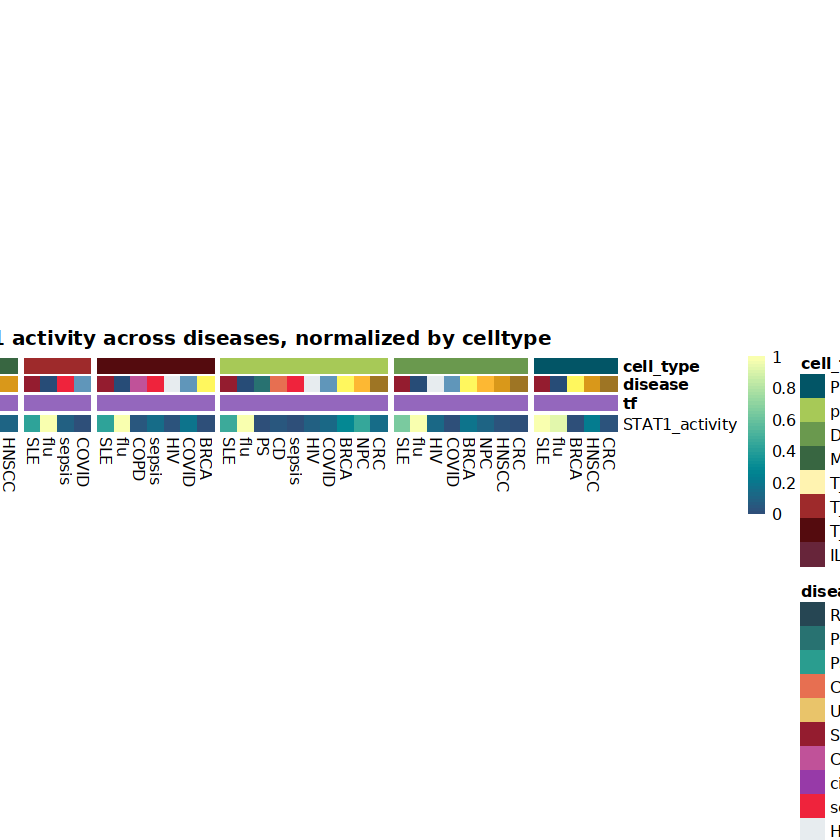

In [96]:
print(a)

### T-statistic

In [51]:
figure_path <- paste0(outputpath, tf_name, "_targets_tstatistic_heatmap.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    tf_xx,
    border_color = NA,
    na_col = "white",
    #color = my_color,
    breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0("relative expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(9, 13, 20, 30, 38)
    )
print(a)
dev.off()

pdf 
  4

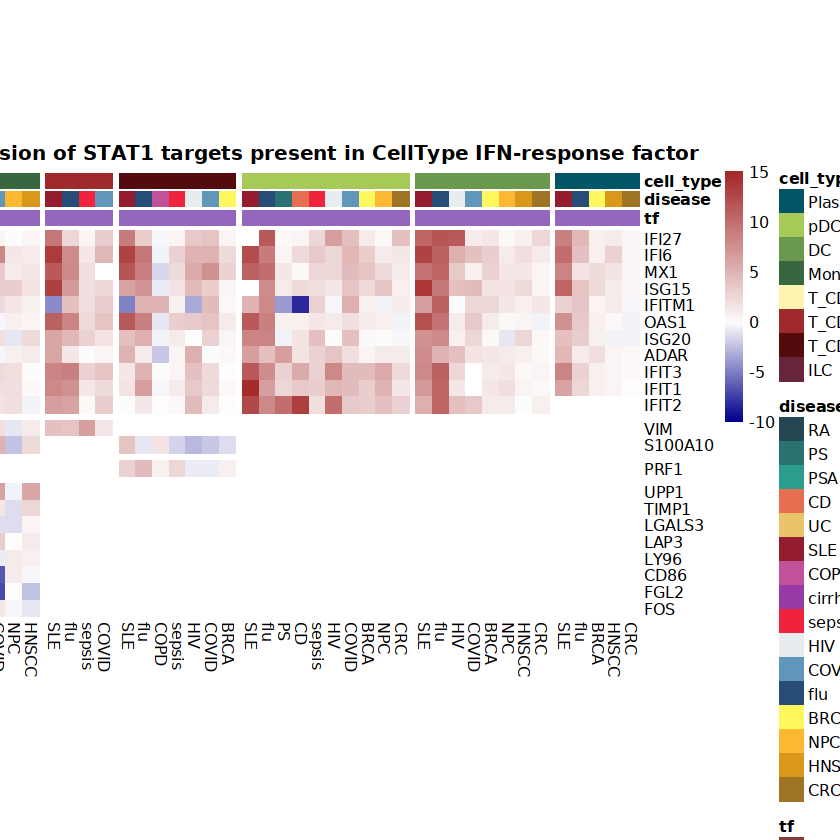

In [30]:
print(a)

### GEX

In [57]:
stat1_targets_order <- c('IFI27', 'IFI6', 'MX1', 'ISG15',  'IFITM1', 'OAS1', "ISG20", "ADAR", "IFIT3","IFIT1",
                         'IFIT2','VIM',  'S100A10', 'PRF1', 'UPP1', 'TIMP1', 'LGALS3', 'LAP3',
                         'LY96', 'CD86', 'FGL2', 'FOS')

cell_type_order <- c("Mono", "T_CD8_Naive", "T_CD8_NonNaive", "pDC", "DC", "Plasma")

disease_order <- c("healthy", "SLE", "flu", "RA", "PS", "PSA", "CD", "UC", "MS",
                   "asthma", "COPD", "cirrhosis", "sepsis", "HIV", "HBV", "COVID",
                   "BRCA", "NPC", "HNSCC", "CRC")

In [111]:
sce

class: SingleCellExperiment 
dim: 8253 10313 
metadata(4): Factor_markers Gene_Weights Gene_selection_parameters
  Input_signatures
assays(1): X
rownames(8253): ENSG00000000003 ENSG00000000457 ... ENSG00000280789
  ENSG00000282608
rowData names(5): hgnc_id symbol locus_group HUGO_status
  SPECTRA_selected_genes
colnames(10313): Perez2022_1368_T0_B-0 Perez2022_1368_T0_DC-0 ...
  Terekhova2023_B17_T0_Cycling_cells-1
  Terekhova2023_B17_T0_Progenitors-1
colData names(9): studyID sampleID ... psbulk_n_cells diseaseGroup
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [58]:
# 1. Extract normalized expression matrix
expr <- assay(sce, "X")

# 2. Map gene symbols to rownames
gene_symbols <- rowData(sce)$symbol
rownames(expr) <- gene_symbols

# 3. Subset expression matrix for selected genes
genes_to_use <- intersect(stat1_targets_order, gene_symbols)
expr_sub <- expr[genes_to_use, , drop = FALSE]

# 4. Extract and clean cell metadata
cell_meta <- as.data.frame(colData(sce))
cell_meta <- cell_meta %>%
  filter(Level1 %in% cell_type_order, disease %in% disease_order)

# 5. Subset columns of expression matrix to match filtered cells
expr_sub <- expr_sub[, rownames(cell_meta), drop = FALSE]

# 6. Create group label: celltype__disease
cell_meta$group <- paste0(cell_meta$Level1, "__", cell_meta$disease)

# 7. Compute mean expression per gene per group
df_long <- as.data.frame(t(expr_sub)) %>%
  mutate(group = cell_meta$group) %>%
  pivot_longer(cols = -group, names_to = "gene", values_to = "expr") %>%
  group_by(group, gene) %>%
  summarise(mean_expr = mean(expr, na.rm = TRUE), .groups = "drop")

# 8. Convert to wide format (genes as rows, groups as columns)
means_df <- df_long %>%
  pivot_wider(names_from = group, values_from = mean_expr)

# 9. Restore gene names as rownames and ensure correct row order
means_mat <- as.data.frame(means_df)
rownames(means_mat) <- means_mat$gene
means_mat <- means_mat[stat1_targets_order[stat1_targets_order %in% rownames(means_mat)], -1, drop = FALSE]

# 10. Create desired column order based on cell_type_order + disease_order
desired_col_order <- unlist(lapply(cell_type_order, function(ct) {
  sapply(disease_order, function(dz) paste0(ct, "__", dz))
}))
# Keep only existing columns in that order
desired_col_order <- desired_col_order[desired_col_order %in% colnames(means_mat)]
means_mat <- means_mat[, desired_col_order]

# Final matrix: genes (rows) x celltype__disease (columns)
means_mat

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__PS,Mono__PSA,Mono__CD,Mono__UC,Mono__MS,Mono__asthma,⋯,Plasma__COPD,Plasma__cirrhosis,Plasma__sepsis,Plasma__HIV,Plasma__HBV,Plasma__COVID,Plasma__BRCA,Plasma__NPC,Plasma__HNSCC,Plasma__CRC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IFI27,0.5680440,12.7940734,19.3787875,0.6019423,0.2788973,0.37060174,0.7154109,0.5650863,0.08001578,0.5488176,⋯,0.18848770,0.23742774,1.68044348,2.6568084,0.03882512,3.83195365,0.73890040,0.27890057,0.29643856,0.37587532
IFI6,3.3942252,15.7695980,16.9931788,4.5120659,2.7098491,2.40883581,4.2556415,2.4152116,3.27978473,3.9891223,⋯,2.25723623,2.05557711,4.14598022,4.9432611,0.83516113,5.49899855,3.04399859,2.13456962,2.69750794,2.29313391
MX1,1.2403748,2.8826384,5.9922935,1.1371200,1.1945945,1.02140815,1.0857963,1.0446208,0.71720659,2.2875457,⋯,1.60036602,1.02146462,1.85498282,2.2811246,0.66617981,2.91711391,3.01789219,1.47527039,1.12262323,1.21163076
ISG15,3.4356079,14.7023425,14.1578465,3.4658376,3.3210189,2.09721308,3.6060080,3.0856261,2.86639578,3.5553870,⋯,3.25287060,2.50824542,3.07274882,4.8684964,3.47244054,4.60604895,4.34257832,5.94392262,3.59117756,2.70885259
IFITM1,1.9768815,4.4608389,13.4212473,0.9994931,2.8725660,1.61993259,1.6091440,2.0355672,0.59053345,0.5274391,⋯,4.05558574,1.44861161,4.87467346,1.4358235,2.17063167,5.55865393,4.13321443,3.51778096,2.21278282,2.63574478
OAS1,1.6761708,2.5950579,3.6693256,0.6261347,0.6021325,0.55783482,0.7115230,0.6173215,1.51445692,2.4353647,⋯,1.66934672,1.25043929,1.63936574,1.1030250,1.07219303,2.13517813,2.78659275,1.98238413,1.35518801,1.44309221
ISG20,0.6718601,1.4424829,1.7527655,1.0009100,0.8341089,0.80316598,1.1751664,1.1635187,0.49873252,0.7691157,⋯,23.68421676,22.69800282,18.92850021,12.9864616,22.45960668,21.70997674,27.25551758,26.20306416,21.64269453,18.85960773
ADAR,2.3526981,2.5386795,2.9400898,2.6500992,3.2505128,2.76637590,2.9143757,2.7396983,2.53950982,2.6440286,⋯,1.74287729,1.65293775,1.27092077,3.2584390,1.14124930,1.69230648,2.58935623,1.56525161,1.39437308,1.82894637
IFIT3,0.5452371,1.4607259,3.0882663,0.3849164,0.5223297,0.30903353,0.6177908,0.4236832,0.41716604,1.1282505,⋯,0.08547442,0.02944068,0.08574763,0.1594493,0.04512032,0.13846258,0.06933533,0.09852148,0.03542417,0.04937341


In [59]:
group_vector <- paste0(tf_df$cell_type, "__", tf_df$disease)
group_vector

[1] "Mono__SLE"              "Mono__flu"              "Mono__RA"              
 [4] "Mono__UC"               "Mono__cirrhosis"        "Mono__sepsis"          
 [7] "Mono__COVID"            "Mono__NPC"              "Mono__HNSCC"           
[10] "T_CD8_Naive__SLE"       "T_CD8_Naive__flu"       "T_CD8_Naive__sepsis"   
[13] "T_CD8_Naive__COVID"     "T_CD8_NonNaive__SLE"    "T_CD8_NonNaive__flu"   
[16] "T_CD8_NonNaive__COPD"   "T_CD8_NonNaive__sepsis" "T_CD8_NonNaive__HIV"   
[19] "T_CD8_NonNaive__COVID"  "T_CD8_NonNaive__BRCA"   "pDC__SLE"              
[22] "pDC__flu"               "pDC__PS"                "pDC__CD"               
[25] "pDC__sepsis"            "pDC__HIV"               "pDC__COVID"            
[28] "pDC__BRCA"              "pDC__NPC"               "pDC__CRC"              
[31] "DC__SLE"                "DC__flu"                "DC__HIV"               
[34] "DC__COVID"              "DC__BRCA"               "DC__NPC"               
[37] "DC__HNSCC"              "DC__CRC"                "Plasma__SLE"           
[40] "Plasma__flu"            "Plasma__BRCA"           "Plasma__HNSCC"         
[43] "Plasma__CRC"

In [60]:
original_groups <- group_vector
cell_types <- sub("__.*", "", original_groups)
first_occurrence <- !duplicated(cell_types)
healthy_entries <- paste0(cell_types[first_occurrence], "__healthy")
valid_vector <- character(0)
insert_idx <- which(first_occurrence)
for (i in seq_along(original_groups)) {
  if (i %in% insert_idx) {
    valid_vector <- c(valid_vector, healthy_entries[which(insert_idx == i)])
  }
  valid_vector <- c(valid_vector, original_groups[i])
}
valid_vector

[1] "Mono__healthy"           "Mono__SLE"              
 [3] "Mono__flu"               "Mono__RA"               
 [5] "Mono__UC"                "Mono__cirrhosis"        
 [7] "Mono__sepsis"            "Mono__COVID"            
 [9] "Mono__NPC"               "Mono__HNSCC"            
[11] "T_CD8_Naive__healthy"    "T_CD8_Naive__SLE"       
[13] "T_CD8_Naive__flu"        "T_CD8_Naive__sepsis"    
[15] "T_CD8_Naive__COVID"      "T_CD8_NonNaive__healthy"
[17] "T_CD8_NonNaive__SLE"     "T_CD8_NonNaive__flu"    
[19] "T_CD8_NonNaive__COPD"    "T_CD8_NonNaive__sepsis" 
[21] "T_CD8_NonNaive__HIV"     "T_CD8_NonNaive__COVID"  
[23] "T_CD8_NonNaive__BRCA"    "pDC__healthy"           
[25] "pDC__SLE"                "pDC__flu"               
[27] "pDC__PS"                 "pDC__CD"                
[29] "pDC__sepsis"             "pDC__HIV"               
[31] "pDC__COVID"              "pDC__BRCA"              
[33] "pDC__NPC"                "pDC__CRC"               
[35] "DC__healthy"             "DC__SLE"                
[37] "DC__flu"                 "DC__HIV"                
[39] "DC__COVID"               "DC__BRCA"               
[41] "DC__NPC"                 "DC__HNSCC"              
[43] "DC__CRC"                 "Plasma__healthy"        
[45] "Plasma__SLE"             "Plasma__flu"            
[47] "Plasma__BRCA"            "Plasma__HNSCC"          
[49] "Plasma__CRC"

In [61]:
gex_xx <- means_mat[, valid_vector, drop = FALSE]
head(gex_xx)

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__UC,Mono__cirrhosis,Mono__sepsis,Mono__COVID,Mono__NPC,Mono__HNSCC,⋯,DC__BRCA,DC__NPC,DC__HNSCC,DC__CRC,Plasma__healthy,Plasma__SLE,Plasma__flu,Plasma__BRCA,Plasma__HNSCC,Plasma__CRC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IFI27,0.568044,12.794073,19.378788,0.6019423,0.5650863,0.6413959,2.992792,18.800993,0.9444881,0.3503048,⋯,1.001110,0.5021724,0.2080648,1.2946556,0.3380734,3.186605,3.665519,0.7389004,0.2964386,0.3758753
IFI6,3.394225,15.769598,16.993179,4.5120659,2.4152116,3.5637717,4.840966,10.955226,5.2462852,4.2546769,⋯,6.998387,3.3314352,3.1016259,3.7427481,1.8925398,5.666548,7.815271,3.0439986,2.6975079,2.2931339
MX1,1.240375,2.882638,5.992294,1.1371200,1.0446208,1.5494651,1.648008,3.282567,2.3804240,1.5470204,⋯,5.242816,2.7901129,1.6504398,2.0642188,0.9203085,2.086304,5.231617,3.0178922,1.1226232,1.2116308
ISG15,3.435608,14.702342,14.157847,3.4658376,3.0856261,3.3795943,4.145983,7.610944,9.4298223,4.3443242,⋯,5.251596,6.1186812,3.5018734,2.8536211,2.7731390,8.336277,6.871295,4.3425783,3.5911776,2.7088526
IFITM1,1.976881,4.460839,13.421247,0.9994931,2.0355672,1.6218683,3.487640,7.146232,4.5679857,1.6039316,⋯,4.425129,3.1905153,1.8043930,2.9575926,3.2354623,3.863186,9.353786,4.1332144,2.2127828,2.6357448
OAS1,1.676171,2.595058,3.669326,0.6261347,0.6173215,2.0191676,1.892521,2.432135,2.7786746,1.6889126,⋯,2.073429,1.0582211,0.9918167,0.8491079,1.6303288,2.336834,2.954498,2.7865927,1.3551880,1.4430922


In [62]:
# Extract cell types from colnames
cell_types <- sub("__.*", "", colnames(gex_xx))
unique_cell_types <- unique(cell_types)

# Initialize output matrix
gex_xx_scaled <- gex_xx  # will hold scaled values

# Loop through each cell type
for (ct in unique_cell_types) {
  cols_in_ct <- which(cell_types == ct)
  
  # Subset the matrix for this cell type
  submatrix <- gex_xx[, cols_in_ct, drop = FALSE]
  
  # Apply min-max scaling row-wise
  scaled_submatrix <- t(apply(submatrix, 1, function(x) {
    rng <- range(x, na.rm = TRUE)
    if (diff(rng) == 0 || all(is.na(x))) {
      return(rep(NA, length(x)))  # avoid divide by 0 or all NA
    } else {
      return((x - rng[1]) / diff(rng))
    }
  }))
  
  # Replace in the output
  gex_xx_scaled[, cols_in_ct] <- scaled_submatrix
}

In [63]:
head(tf_xx)

,SPECTRA_46:STAT1:SLE:Mono,SPECTRA_46:STAT1:flu:Mono,SPECTRA_46:STAT1:RA:Mono,SPECTRA_46:STAT1:UC:Mono,SPECTRA_46:STAT1:cirrhosis:Mono,SPECTRA_46:STAT1:sepsis:Mono,SPECTRA_46:STAT1:COVID:Mono,SPECTRA_46:STAT1:NPC:Mono,SPECTRA_46:STAT1:HNSCC:Mono,SPECTRA_98:STAT1:SLE:T_CD8_Naive,⋯,SPECTRA_24:STAT1:COVID:DC,SPECTRA_24:STAT1:BRCA:DC,SPECTRA_24:STAT1:NPC:DC,SPECTRA_24:STAT1:HNSCC:DC,SPECTRA_24:STAT1:CRC:DC,SPECTRA_56:STAT1:SLE:Plasma,SPECTRA_56:STAT1:flu:Plasma,SPECTRA_56:STAT1:BRCA:Plasma,SPECTRA_56:STAT1:HNSCC:Plasma,SPECTRA_56:STAT1:CRC:Plasma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IFI27,9.998,10.742,1.152,0.913,-0.732,2.671,0.447,-0.012,0.560,9.355,⋯,1.245,1.553,0.275,0.773,2.491,8.612,4.643,0.848,1.038,0.360
IFI6,19.784,9.008,3.103,0.513,-0.013,2.258,8.246,1.387,1.169,13.588,⋯,4.212,3.312,1.141,1.883,1.175,9.925,4.107,0.940,2.894,0.473
MX1,11.378,8.111,0.997,0.580,-0.979,1.609,3.623,1.230,1.388,11.531,⋯,0.774,3.094,1.353,1.310,0.393,8.495,1.671,2.394,1.644,0.375
ISG15,22.107,7.620,1.215,0.590,-0.417,1.163,3.373,3.149,1.606,13.213,⋯,4.557,1.872,1.797,2.254,0.452,10.692,3.974,2.249,1.001,0.581
IFITM1,4.806,7.776,-5.760,-3.500,-1.255,2.365,2.320,1.473,0.894,-4.417,⋯,2.715,2.717,1.512,0.947,1.567,2.806,3.933,0.548,0.966,-0.216
OAS1,11.526,4.246,0.437,0.328,-0.392,-0.706,-0.248,0.774,0.557,10.775,⋯,3.633,1.203,0.283,0.588,-0.433,7.591,3.650,0.961,0.224,-0.421


In [64]:
# Step 1: Extract cell types from colnames (last element after ":")
cell_types <- sapply(strsplit(colnames(tf_xx), ":"), tail, 1)
unique_cell_types <- unique(cell_types)

# Step 2: For each gene, check which cell types have all NA values
na_celltypes_per_gene <- lapply(rownames(tf_xx), function(gene) {
  gene_row <- tf_xx[gene, ]
  
  # For each unique cell type, check if all values are NA
  cell_types_with_all_na <- unique_cell_types[
    sapply(unique_cell_types, function(ct) {
      all(is.na(gene_row[cell_types == ct]))
    })
  ]
  
  return(cell_types_with_all_na)
})

# Step 3: Name the list by gene
names(na_celltypes_per_gene) <- rownames(tf_xx)
na_celltypes_per_gene

$IFI27
character(0)

$IFI6
character(0)

$MX1
character(0)

$ISG15
character(0)

$IFITM1
character(0)

$OAS1
character(0)

$ISG20
character(0)

$ADAR
character(0)

$IFIT3
character(0)

$IFIT1
character(0)

$IFIT2
[1] "Plasma"

$VIM
[1] "T_CD8_NonNaive" "pDC"            "DC"             "Plasma"        

$S100A10
[1] "T_CD8_Naive" "pDC"         "DC"          "Plasma"     

$PRF1
[1] "Mono"        "T_CD8_Naive" "pDC"         "DC"          "Plasma"     

$UPP1
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"        

$TIMP1
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"        

$LGALS3
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"        

$LAP3
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"        

$LY96
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"        

$CD86
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"        

$FGL2
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"        

$FOS
[1] "T_CD8_Naive"    "T_CD8_NonNaive" "pDC"            "DC"            
[5] "Plasma"

In [65]:
# Make a copy to modify
gex_xx_cleaned <- gex_xx

# Loop over each gene
for (gene in rownames(gex_xx_cleaned)) {
  # Get list of cell types to blank out for this gene
  na_celltypes <- na_celltypes_per_gene[[gene]]
  
  if (length(na_celltypes) > 0) {
    # For each cell type, find columns starting with "celltype__"
    cols_to_na <- unlist(lapply(na_celltypes, function(ct) {
      grep(paste0("^", ct, "__"), colnames(gex_xx_cleaned), value = TRUE)
    }))
    
    # Set those columns to NA for this gene
    gex_xx_cleaned[gene, cols_to_na] <- NA
  }
}

In [66]:
# Make a copy to modify
gex_xx_scaled_cleaned <- gex_xx_scaled

# Loop over each gene
for (gene in rownames(gex_xx_cleaned)) {
  # Get list of cell types to blank out for this gene
  na_celltypes <- na_celltypes_per_gene[[gene]]
  
  if (length(na_celltypes) > 0) {
    # For each cell type, find columns starting with "celltype__"
    cols_to_na <- unlist(lapply(na_celltypes, function(ct) {
      grep(paste0("^", ct, "__"), colnames(gex_xx_scaled_cleaned), value = TRUE)
    }))
    
    # Set those columns to NA for this gene
    gex_xx_scaled_cleaned[gene, cols_to_na] <- NA
  }
}

In [67]:
group_ids <- colnames(gex_xx)
split_info <- strsplit(group_ids, "__")
ids_df <- data.frame(
  group = group_ids,
  tf = "STAT1",
  disease = sapply(split_info, `[`, 2),
  cell_type = sapply(split_info, `[`, 1),
  stringsAsFactors = FALSE
)
ids_df <- ids_df %>%
  mutate(
    tf = factor(tf),
    disease = factor(disease),
    cell_type = factor(cell_type)
  )
rownames(ids_df) <- ids_df$group
ids_df <- ids_df[, !(colnames(ids_df) == "group"), drop = FALSE]
head(ids_df)

,tf,disease,cell_type
,<fct>,<fct>,<fct>
Mono__healthy,STAT1,healthy,Mono
Mono__SLE,STAT1,SLE,Mono
Mono__flu,STAT1,flu,Mono
Mono__RA,STAT1,RA,Mono
Mono__UC,STAT1,UC,Mono
Mono__cirrhosis,STAT1,cirrhosis,Mono


In [68]:
# Colors
my_colour_annot <- list(
    tf = tfs_colors[names(tfs_colors) %in% levels(ids_df$tf)],
    disease = disease_colors[names(disease_colors) %in% levels(ids_df$disease)],
    cell_type = cell_colors[names(cell_colors) %in% levels(ids_df$cell_type)]
)

In [69]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_raw.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_cleaned,
    border_color = NA,
    na_col = "white",
    #scale = "row", 
    #color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10, 15, 23, 34, 43)
    )
print(a)
dev.off()

pdf 
  4

In [70]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_scaled_bygene.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_cleaned,
    border_color = NA,
    na_col = "white",
    scale = "row", 
    color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10, 15, 23, 34, 43)
    )
print(a)
dev.off()

pdf 
  4

In [71]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_scaledmaxmin.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_scaled_cleaned,
    border_color = NA,
    na_col = "white",
    #scale = "row", 
    #color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10, 15, 23, 34, 43)
    )
print(a)
dev.off()

pdf 
  4

In [72]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_cleaned,
    border_color = NA,
    na_col = "white",
    scale = "row", 
    color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10, 15, 23, 34, 43)
    )
print(a)
dev.off()

pdf 
  4

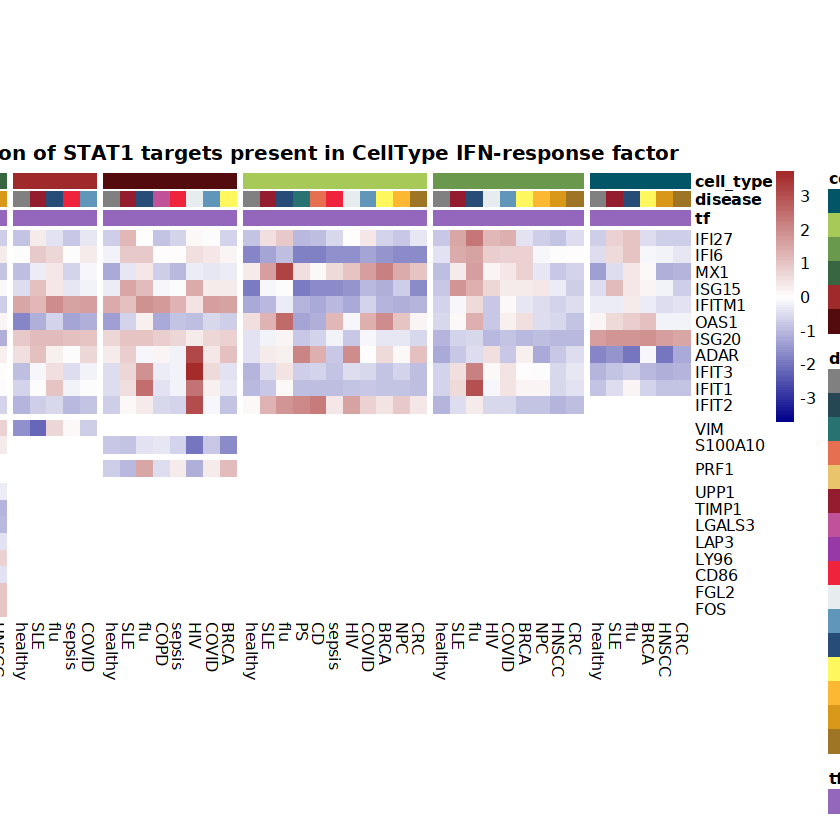

In [53]:
print(a)

## SP1 

In [23]:
# Colors
my_colour_annot <- list(
    tf = tfs_colors[names(tfs_colors) %in% levels(col_annot$tf)],
    disease = disease_colors[names(disease_colors) %in% levels(col_annot$disease)],
    cell_type = cell_colors[names(cell_colors) %in% levels(col_annot$cell_type)]
)


In [24]:
sp1_targets_order <- c('GAPDH', 'ACTB', 'S100A6', 'IFITM3', 'ISG20','FTH1',
'OAS1',   'MX2', 'MT2A',
    
'RAC2',
'CALM1', 'SRSF7','FUS', 

               'ADGRG1',            
 'LGALS1',
               
'COX4I1', 'VIM',
   'S100A10',                           
               
'FBP1', 'S100A8', 'TYMP', 'TIMP1', 'LGALS3', 'ITGAX', 'SLC11A1', 'SPI1', 'PSAP', 'STXBP2', 'TKT', 'FGL2', 'LYZ', 'TNFSF13', 'TSPO', 'GSTP1',
               'FOS',"SERPINA1"
              )

In [25]:
tf_name <- "SP1"
tf_df <- tf_list[[tf_name]]

cell_type_order <- c("Mono", "T_CD8_NonNaive",  "T_CD4_Naive","ILC")
tf_order <- c("STAT1", "SP1")
disease_order <- c(
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

# Convert columns to factors with specified levels
tf_df <- tf_df %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order),
    tf = factor(tf, levels = tf_order),
    disease = factor(disease, levels = disease_order)
  )

# Order the data frame by cell_type, tf, and disease
tf_df <- tf_df %>%
  arrange(tf, cell_type, disease)

tf_xx <-   xx[sp1_targets_order, rownames(tf_df)]
tf_xx <- tf_xx[rowSums(is.na(tf_xx)) != ncol(tf_xx), ]

### TF activity

In [26]:
tf_name = "SP1"
df = tf_acts_dfs[[tf_name]]
head(df)

,cell_type,tf,activity,pval,SPECTRA,disease,match_id
,<fct>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<chr>
1,Mono,SP1,7.048428,1.955237e-12,SPECTRA_46,SLE,SPECTRA_46:SP1:SLE:Mono
2,Mono,SP1,5.590240,2.339856e-08,SPECTRA_46,flu,SPECTRA_46:SP1:flu:Mono
3,Mono,SP1,3.328630,8.765658e-04,SPECTRA_46,RA,SPECTRA_46:SP1:RA:Mono
4,Mono,SP1,2.072936,3.820918e-02,SPECTRA_46,PSA,SPECTRA_46:SP1:PSA:Mono
5,Mono,SP1,1.986377,4.702449e-02,SPECTRA_46,CD,SPECTRA_46:SP1:CD:Mono
6,Mono,SP1,2.973093,2.956669e-03,SPECTRA_46,UC,SPECTRA_46:SP1:UC:Mono


In [27]:
df_matrix <- setNames(as.data.frame(t(df$activity)), df$match_id)
rownames(df_matrix) <- paste0(tf_name, "_activity")
df_matrix

,SPECTRA_46:SP1:SLE:Mono,SPECTRA_46:SP1:flu:Mono,SPECTRA_46:SP1:RA:Mono,SPECTRA_46:SP1:PSA:Mono,SPECTRA_46:SP1:CD:Mono,SPECTRA_46:SP1:UC:Mono,SPECTRA_46:SP1:COPD:Mono,SPECTRA_46:SP1:cirrhosis:Mono,SPECTRA_46:SP1:sepsis:Mono,SPECTRA_46:SP1:HNSCC:Mono,⋯,SPECTRA_71:SP1:flu:T_CD4_Naive,SPECTRA_71:SP1:UC:T_CD4_Naive,SPECTRA_71:SP1:COPD:T_CD4_Naive,SPECTRA_71:SP1:HNSCC:T_CD4_Naive,SPECTRA_34:SP1:SLE:ILC,SPECTRA_34:SP1:flu:ILC,SPECTRA_34:SP1:COPD:ILC,SPECTRA_34:SP1:cirrhosis:ILC,SPECTRA_34:SP1:sepsis:ILC,SPECTRA_34:SP1:HNSCC:ILC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP1_activity,7.048428,5.59024,3.32863,2.072936,1.986377,2.973093,2.535898,7.178725,2.5875,4.751094,⋯,5.408263,2.121189,3.63045,2.358088,5.381399,7.220215,3.511353,3.025925,3.005028,2.528998


In [78]:
figure_path <- paste0(outputpath, tf_name, "_activity.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    df_matrix,
    border_color = NA,
    na_col = "white",
    color = hcl.colors(50, "BluYl"),
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0(tf_name, " activity accross celltypes and diseases"),
    #gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10,15, 20)
    )
print(a)
dev.off()

pdf 
  4

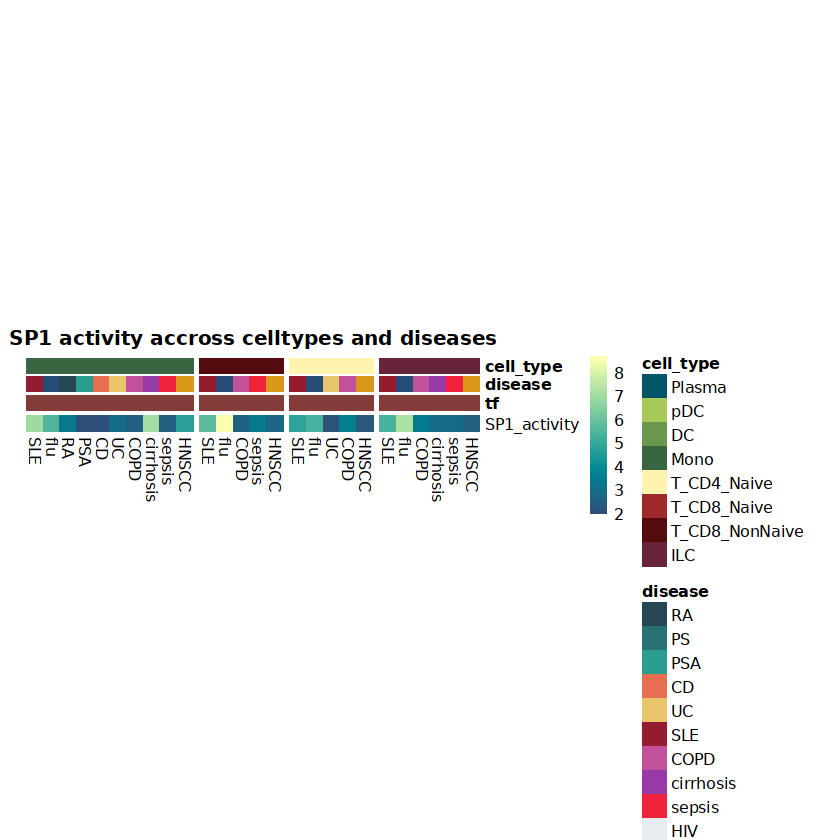

In [79]:
print(a)

In [80]:
# Extract cell types from column names (last part after colon)
col_cell_types <- sapply(strsplit(colnames(df_matrix), ":"), tail, 1)
unique_cell_types <- unique(col_cell_types)

# Initialize output (same shape)
df_scaled <- df_matrix

# Loop over each cell type
for (ct in unique_cell_types) {
  cols_in_ct <- which(col_cell_types == ct)
  values <- as.numeric(df_matrix[1, cols_in_ct])
  
  # Min-max scale within the cell type
  rng <- range(values, na.rm = TRUE)
  if (diff(rng) > 0) {
    df_scaled[1, cols_in_ct] <- (values - rng[1]) / diff(rng)
  } else {
    df_scaled[1, cols_in_ct] <- NA  # or 0 if you prefer
  }
}
df_scaled

,SPECTRA_46:SP1:SLE:Mono,SPECTRA_46:SP1:flu:Mono,SPECTRA_46:SP1:RA:Mono,SPECTRA_46:SP1:PSA:Mono,SPECTRA_46:SP1:CD:Mono,SPECTRA_46:SP1:UC:Mono,SPECTRA_46:SP1:COPD:Mono,SPECTRA_46:SP1:cirrhosis:Mono,SPECTRA_46:SP1:sepsis:Mono,SPECTRA_46:SP1:HNSCC:Mono,⋯,SPECTRA_71:SP1:flu:T_CD4_Naive,SPECTRA_71:SP1:UC:T_CD4_Naive,SPECTRA_71:SP1:COPD:T_CD4_Naive,SPECTRA_71:SP1:HNSCC:T_CD4_Naive,SPECTRA_34:SP1:SLE:ILC,SPECTRA_34:SP1:flu:ILC,SPECTRA_34:SP1:COPD:ILC,SPECTRA_34:SP1:cirrhosis:ILC,SPECTRA_34:SP1:sepsis:ILC,SPECTRA_34:SP1:HNSCC:ILC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP1_activity,0.974906,0.6940718,0.2585059,0.01667053,0,0.1900328,0.1058329,1,0.1157709,0.5324599,⋯,1,0,0.4591503,0.07206988,0.60803,1,0.2094029,0.1059271,0.1014725,0


In [81]:
figure_path <- paste0(outputpath, tf_name, "_activity_scaledbycelltype.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    df_scaled,
    border_color = NA,
    na_col = "white",
    color = hcl.colors(50, "BluYl"),
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0(tf_name, " activity across diseases, normalized by celltype"),
    #gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10,15, 20)
    )
print(a)
dev.off()

pdf 
  4

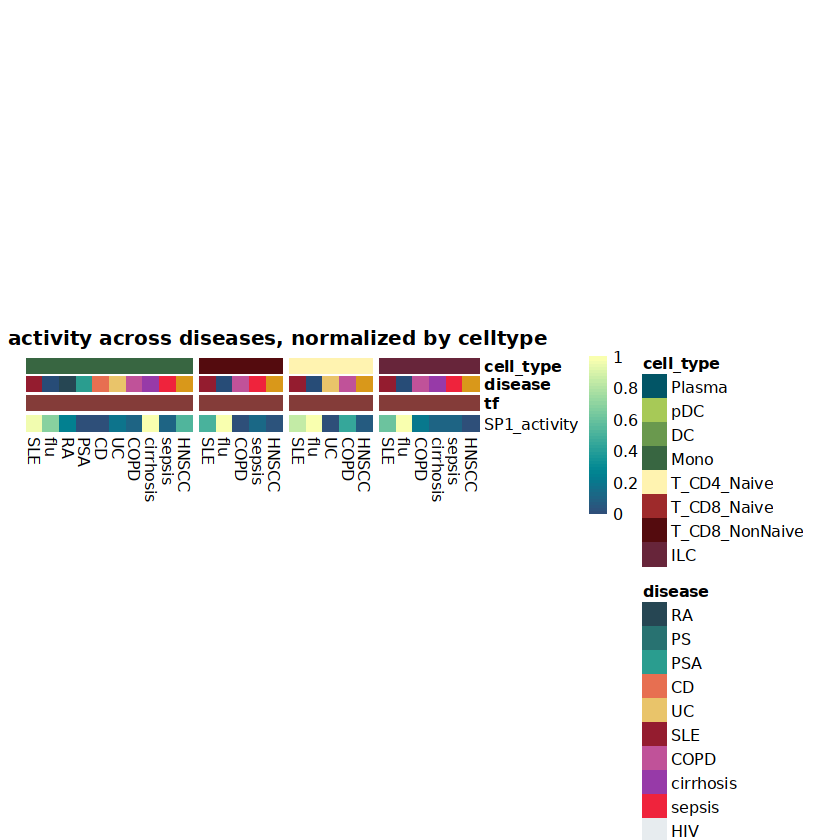

In [82]:
print(a)

### T-statistic

In [83]:
figure_path <- paste0(outputpath, tf_name, "_targets_tstatistic_heatmap.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    tf_xx,
    border_color = NA,
    na_col = "white",
    color = my_color,
    breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0("relative expression of ", tf_name, " targets present in CellType IFN-response factor"),
    #gaps_row = c(9,10,12,13,14,32,35),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5,8, 10)
    gaps_col = c(10,15, 20)
    )
print(a)
dev.off()

pdf 
  4

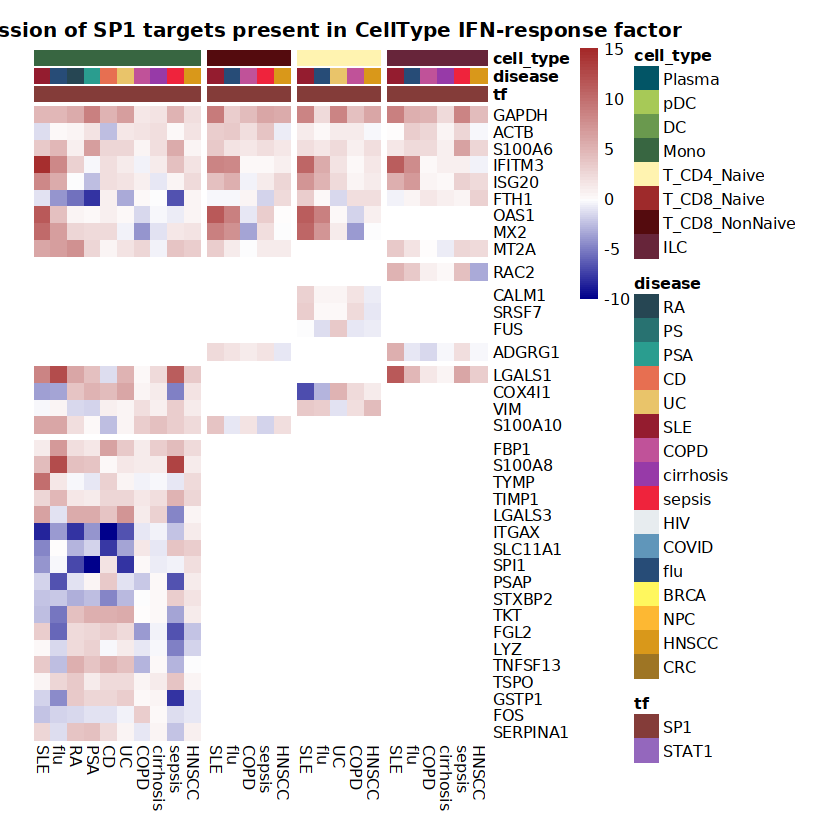

In [84]:
print(a)

### GEX

In [20]:
sp1_targets_order <- c(
  "GAPDH", "ACTB", "S100A6", "IFITM3", "ISG20", "FTH1",
  "OAS1", "MX2", "MT2A", "RAC2",
  "CALM1", "SRSF7", "FUS",
  "ADGRG1", "LGALS1",
  "COX4I1", "VIM", "S100A10",
  "FBP1", "S100A8", "TYMP", "TIMP1", "LGALS3", "ITGAX",
  "SLC11A1", "SPI1", "PSAP", "STXBP2", "TKT", "FGL2", "LYZ",
  "TNFSF13", "TSPO", "GSTP1", "FOS", "SERPINA1"
)

cell_type_order <- c("Mono", "T_CD8_NonNaive",  "T_CD4_Naive","ILC")

disease_order <- c(
    "healthy",
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

**Test with chemistry**

In [21]:
# 1. Extract normalized expression matrix
expr <- assay(sce, "lognorm")

# 2. Map gene symbols to rownames
gene_symbols <- rowData(sce)$symbol
rownames(expr) <- gene_symbols

# 3. Subset expression matrix for selected genes
genes_to_use <- intersect(sp1_targets_order, gene_symbols)
expr_sub <- expr[genes_to_use, , drop = FALSE]

# 4. Extract and clean cell metadata
cell_meta <- as.data.frame(colData(sce))
cell_meta <- cell_meta %>%
  filter(Level1 %in% cell_type_order, disease %in% disease_order)
cell_meta$Dis_chem <- paste0(cell_meta$disease, "__", cell_meta$chemistry)
head(cell_meta)

,studyID,sampleID,chemistry,disease,sex,binned_age,Level1,psbulk_n_cells,diseaseGroup,Dis_chem
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<chr>
Perez2022_1368_T0_ILC-0,Perez2022,Perez2022_1368_T0,3_GEX_V2,SLE,male,41-50,ILC,368,IMIDs,SLE__3_GEX_V2
Perez2022_1368_T0_Mono-0,Perez2022,Perez2022_1368_T0,3_GEX_V2,SLE,male,41-50,Mono,816,IMIDs,SLE__3_GEX_V2
Perez2022_1368_T0_T_CD4_Naive-0,Perez2022,Perez2022_1368_T0,3_GEX_V2,SLE,male,41-50,T_CD4_Naive,307,IMIDs,SLE__3_GEX_V2
Perez2022_1368_T0_T_CD8_NonNaive-0,Perez2022,Perez2022_1368_T0,3_GEX_V2,SLE,male,41-50,T_CD8_NonNaive,283,IMIDs,SLE__3_GEX_V2
Perez2022_1848_T0_ILC-0,Perez2022,Perez2022_1848_T0,3_GEX_V2,SLE,female,61-70,ILC,437,IMIDs,SLE__3_GEX_V2
Perez2022_1848_T0_Mono-0,Perez2022,Perez2022_1848_T0,3_GEX_V2,SLE,female,61-70,Mono,1046,IMIDs,SLE__3_GEX_V2


In [22]:
chemistry_order <- c("3_GEX_V2", "3_GEX_V3",  "5_GEX_V1","5_GEX_V2")

In [23]:
# 5. Subset columns of expression matrix to match filtered cells
expr_sub <- expr_sub[, rownames(cell_meta), drop = FALSE]

# 6. Create group label: celltype__disease
cell_meta$group <- paste0(cell_meta$Level1, "__", cell_meta$Dis_chem)

# 7. Compute mean expression per gene per group
df_long <- as.data.frame(t(expr_sub)) %>%
  mutate(group = cell_meta$group) %>%
  pivot_longer(cols = -group, names_to = "gene", values_to = "expr") %>%
  group_by(group, gene) %>%
  summarise(mean_expr = mean(expr, na.rm = TRUE), .groups = "drop")

# 8. Convert to wide format (genes as rows, groups as columns)
means_df <- df_long %>%
  pivot_wider(names_from = group, values_from = mean_expr)

# 9. Restore gene names as rownames and ensure correct row order
means_mat <- as.data.frame(means_df)
rownames(means_mat) <- means_mat$gene
means_mat <- means_mat[sp1_targets_order[sp1_targets_order %in% rownames(means_mat)], -1, drop = FALSE]

In [28]:
head(df_long)

group,gene,mean_expr
<chr>,<chr>,<dbl>
ILC__BRCA__5_GEX_V2,ACTB,4.8204251
ILC__BRCA__5_GEX_V2,ADGRG1,2.2939329
ILC__BRCA__5_GEX_V2,CALM1,3.1948380
ILC__BRCA__5_GEX_V2,COX4I1,3.0548545
ILC__BRCA__5_GEX_V2,FBP1,0.2166834
ILC__BRCA__5_GEX_V2,FGL2,0.5857603


In [29]:
library(dplyr)
df_long_filtered <- df_long %>%
  filter(
    gene == "ITGAX",
    grepl("Mono", group),
    grepl("3_GEX_V3", group),
    grepl("RA|PS|PsA|healthy", group)
  )
df_long_filtered

group,gene,mean_expr
<chr>,<chr>,<dbl>
Mono__PSA__3_GEX_V3,ITGAX,2.044780
Mono__PS__3_GEX_V3,ITGAX,1.945251
Mono__RA__3_GEX_V3,ITGAX,1.941677
Mono__healthy__3_GEX_V3,ITGAX,1.553379


In [24]:
# 10. Create desired column order based on cell_type_order + disease_order
desired_col_order <- unlist(lapply(cell_type_order, function(ct) {
  unlist(lapply(disease_order, function(dz) {
    sapply(chemistry_order, function(ch) paste0(ct, "__", dz, "__", ch))
  }))
}))
# Keep only existing columns in that order
desired_col_order <- desired_col_order[desired_col_order %in% colnames(means_mat)]
means_mat <- means_mat[, desired_col_order]

In [25]:
# Final matrix: genes (rows) x celltype__disease (columns)
means_mat["ITGAX",]

,Mono__healthy__3_GEX_V2,Mono__healthy__3_GEX_V3,Mono__healthy__5_GEX_V1,Mono__healthy__5_GEX_V2,Mono__SLE__3_GEX_V2,Mono__SLE__3_GEX_V3,Mono__flu__5_GEX_V1,Mono__RA__3_GEX_V3,Mono__PS__3_GEX_V3,Mono__PSA__3_GEX_V3,⋯,ILC__sepsis__5_GEX_V1,ILC__HIV__3_GEX_V2,ILC__HBV__5_GEX_V1,ILC__COVID__3_GEX_V3,ILC__COVID__5_GEX_V1,ILC__COVID__5_GEX_V2,ILC__BRCA__5_GEX_V2,ILC__NPC__5_GEX_V1,ILC__HNSCC__3_GEX_V2,ILC__CRC__5_GEX_V2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ITGAX,1.132031,1.553379,1.248013,1.321081,0.993081,1.761492,0.9784525,1.941677,1.945251,2.04478,⋯,1.024606,1.422024,0.8063039,1.574676,1.087471,1.230113,1.683251,0.9791527,0.8108866,1.105763


**Regular**

In [109]:
# 1. Extract normalized expression matrix
expr <- assay(sce, "X")

# 2. Map gene symbols to rownames
gene_symbols <- rowData(sce)$symbol
rownames(expr) <- gene_symbols

# 3. Subset expression matrix for selected genes
genes_to_use <- intersect(sp1_targets_order, gene_symbols)
expr_sub <- expr[genes_to_use, , drop = FALSE]

# 4. Extract and clean cell metadata
cell_meta <- as.data.frame(colData(sce))
cell_meta <- cell_meta %>%
  filter(Level1 %in% cell_type_order, disease %in% disease_order)

# 5. Subset columns of expression matrix to match filtered cells
expr_sub <- expr_sub[, rownames(cell_meta), drop = FALSE]

# 6. Create group label: celltype__disease
cell_meta$group <- paste0(cell_meta$Level1, "__", cell_meta$disease)

# 7. Compute mean expression per gene per group
df_long <- as.data.frame(t(expr_sub)) %>%
  mutate(group = cell_meta$group) %>%
  pivot_longer(cols = -group, names_to = "gene", values_to = "expr") %>%
  group_by(group, gene) %>%
  summarise(mean_expr = mean(expr, na.rm = TRUE), .groups = "drop")

# 8. Convert to wide format (genes as rows, groups as columns)
means_df <- df_long %>%
  pivot_wider(names_from = group, values_from = mean_expr)

# 9. Restore gene names as rownames and ensure correct row order
means_mat <- as.data.frame(means_df)
rownames(means_mat) <- means_mat$gene
means_mat <- means_mat[sp1_targets_order[sp1_targets_order %in% rownames(means_mat)], -1, drop = FALSE]

# 10. Create desired column order based on cell_type_order + disease_order
desired_col_order <- unlist(lapply(cell_type_order, function(ct) {
  sapply(disease_order, function(dz) paste0(ct, "__", dz))
}))
# Keep only existing columns in that order
desired_col_order <- desired_col_order[desired_col_order %in% colnames(means_mat)]
means_mat <- means_mat[, desired_col_order]

# Final matrix: genes (rows) x celltype__disease (columns)
means_mat

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__PS,Mono__PSA,Mono__CD,Mono__UC,Mono__MS,Mono__asthma,⋯,ILC__COPD,ILC__cirrhosis,ILC__sepsis,ILC__HIV,ILC__HBV,ILC__COVID,ILC__BRCA,ILC__NPC,ILC__HNSCC,ILC__CRC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,46.00822071,49.84543040,77.54184099,62.05991203,55.64518826,70.03293228,61.98198936,67.05048891,65.6343811,56.10555808,⋯,31.7371039,42.7220006,36.22127157,15.8900523,32.53009186,33.78038390,27.14104207,30.83787155,37.00337110,31.90654673
ACTB,204.73886094,187.67359070,263.09014615,144.06443686,149.00496908,153.21776551,117.35340336,150.95735550,202.1677002,226.91335678,⋯,191.2478930,164.6577625,264.40974426,75.8011030,157.03335012,257.13396252,134.80880864,176.11135864,184.52364640,132.13659069
S100A6,133.48654344,145.07656229,187.18161149,82.17397087,86.16998042,117.66604937,93.70210738,92.32997756,160.2266907,136.19134903,⋯,25.2566487,23.8044574,28.26777251,18.1319812,17.28359575,21.89755911,18.35998551,21.62012901,23.56080155,26.11745037
IFITM3,16.04204066,45.70987029,64.34285519,22.13998117,16.63583007,12.47132388,19.45485356,16.87811080,12.8557955,21.52802054,⋯,6.7469442,10.3043730,13.38768075,2.7978264,8.31334019,15.61943570,10.67748610,7.10092266,6.27475139,9.40373162
ISG20,0.67186011,1.44248285,1.75276548,1.00090999,0.83410893,0.80316598,1.17516642,1.16351873,0.4987325,0.76911565,⋯,6.9889906,9.7533461,7.07937766,4.5347846,9.08742208,7.25557723,6.78592372,6.10407405,6.74102613,6.02721684
FTH1,240.70133093,306.77567447,201.33634671,493.68374875,437.85460017,429.55624448,710.35403152,583.80587075,263.7869049,375.33315531,⋯,65.9586544,117.2266846,52.87443946,27.8625517,47.50059891,36.96282146,11.70071161,23.76095638,60.92406609,57.52714184
OAS1,1.67617076,2.59505789,3.66932561,0.62613475,0.60213247,0.55783482,0.71152297,0.61732151,1.5144569,2.43536472,⋯,0.5795930,0.4155121,0.90698421,0.8487245,0.32411163,1.23448070,0.99619288,0.68295247,0.48598622,0.49023244
MX2,1.59117532,2.34277595,3.56411704,1.77383366,1.72545188,1.68388179,1.71450579,1.19958205,1.2472913,2.50387174,⋯,0.5389661,0.4598597,0.75238040,1.6062696,0.44662156,1.19511830,0.93056468,0.52313127,0.48722918,0.66276582
MT2A,10.55497981,28.69654315,26.03144620,52.53457852,18.89128867,32.02638856,24.33669297,28.21211906,7.5309857,7.58244510,⋯,8.6219170,6.1242054,12.16794668,6.1711961,14.52914322,8.98707182,12.30905183,7.72102332,13.55562533,11.64275609


In [ ]:
group_vector <- paste0(tf_df$cell_type, "__", tf_df$disease)
group_vector

In [ ]:
original_groups <- group_vector
cell_types <- sub("__.*", "", original_groups)
first_occurrence <- !duplicated(cell_types)
healthy_entries <- paste0(cell_types[first_occurrence], "__healthy")
valid_vector <- character(0)
insert_idx <- which(first_occurrence)
for (i in seq_along(original_groups)) {
  if (i %in% insert_idx) {
    valid_vector <- c(valid_vector, healthy_entries[which(insert_idx == i)])
  }
  valid_vector <- c(valid_vector, original_groups[i])
}
valid_vector

In [ ]:
gex_xx <- means_mat[, valid_vector, drop = FALSE]
head(gex_xx)

In [ ]:
# Extract cell types from colnames
cell_types <- sub("__.*", "", colnames(gex_xx))
unique_cell_types <- unique(cell_types)

# Initialize output matrix
gex_xx_scaled <- gex_xx  # will hold scaled values

# Loop through each cell type
for (ct in unique_cell_types) {
  cols_in_ct <- which(cell_types == ct)
  
  # Subset the matrix for this cell type
  submatrix <- gex_xx[, cols_in_ct, drop = FALSE]
  
  # Apply min-max scaling row-wise
  scaled_submatrix <- t(apply(submatrix, 1, function(x) {
    rng <- range(x, na.rm = TRUE)
    if (diff(rng) == 0 || all(is.na(x))) {
      return(rep(NA, length(x)))  # avoid divide by 0 or all NA
    } else {
      return((x - rng[1]) / diff(rng))
    }
  }))
  
  # Replace in the output
  gex_xx_scaled[, cols_in_ct] <- scaled_submatrix
}

In [ ]:
head(gex_xx_scaled)

In [ ]:
head(tf_xx)

In [ ]:
# Step 1: Extract cell types from colnames (last element after ":")
cell_types <- sapply(strsplit(colnames(tf_xx), ":"), tail, 1)
unique_cell_types <- unique(cell_types)

# Step 2: For each gene, check which cell types have all NA values
na_celltypes_per_gene <- lapply(rownames(tf_xx), function(gene) {
  gene_row <- tf_xx[gene, ]
  
  # For each unique cell type, check if all values are NA
  cell_types_with_all_na <- unique_cell_types[
    sapply(unique_cell_types, function(ct) {
      all(is.na(gene_row[cell_types == ct]))
    })
  ]
  
  return(cell_types_with_all_na)
})

# Step 3: Name the list by gene
names(na_celltypes_per_gene) <- rownames(tf_xx)
na_celltypes_per_gene

In [110]:
# Make a copy to modify
gex_xx_cleaned <- gex_xx

# Loop over each gene
for (gene in rownames(gex_xx_cleaned)) {
  # Get list of cell types to blank out for this gene
  na_celltypes <- na_celltypes_per_gene[[gene]]
  
  if (length(na_celltypes) > 0) {
    # For each cell type, find columns starting with "celltype__"
    cols_to_na <- unlist(lapply(na_celltypes, function(ct) {
      grep(paste0("^", ct, "__"), colnames(gex_xx_cleaned), value = TRUE)
    }))
    
    # Set those columns to NA for this gene
    gex_xx_cleaned[gene, cols_to_na] <- NA
  }
}
gex_xx_cleaned

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__PSA,Mono__CD,Mono__UC,Mono__COPD,Mono__cirrhosis,Mono__sepsis,⋯,T_CD4_Naive__UC,T_CD4_Naive__COPD,T_CD4_Naive__HNSCC,ILC__healthy,ILC__SLE,ILC__flu,ILC__COPD,ILC__cirrhosis,ILC__sepsis,ILC__HNSCC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,46.0082207,49.845430,77.541841,62.0599120,70.0329323,61.981989,67.0504889,60.356196,81.5645947,69.9730906,⋯,25.5089356,30.2879211,36.8115125,25.282590,28.835946,40.007820,31.737104,42.722001,36.221272,37.003371
ACTB,204.7388609,187.673591,263.090146,144.0644369,153.2177655,117.353403,150.9573555,239.857302,264.5573139,238.6788426,⋯,60.5734582,140.4922702,133.4155786,194.338969,172.521478,340.692154,191.247893,164.657763,264.409744,184.523646
S100A6,133.4865434,145.076562,187.181611,82.1739709,117.6660494,93.702107,92.3299776,142.991900,162.5766411,177.6639982,⋯,20.3422950,30.7614937,28.3595897,20.614486,24.042433,24.183477,25.256649,23.804457,28.267773,23.560802
IFITM3,16.0420407,45.709870,64.342855,22.1399812,12.4713239,19.454854,16.8781108,25.682269,30.8610551,32.7427952,⋯,1.8835109,2.2906004,2.5292619,6.852019,12.807914,20.549330,6.746944,10.304373,13.387681,6.274751
ISG20,0.6718601,1.442483,1.752765,1.0009100,0.8031660,1.175166,1.1635187,1.141702,0.7056194,0.9239105,⋯,8.0673296,8.9546839,8.9640149,6.061472,8.704765,9.483390,6.988991,9.753346,7.079378,6.741026
FTH1,240.7013309,306.775674,201.336347,493.6837487,429.5562445,710.354032,583.8058707,388.458906,403.8095703,212.0594879,⋯,162.1935149,110.4203707,88.3858076,43.879145,64.008203,41.188178,65.958654,117.226685,52.874439,60.924066
OAS1,1.6761708,2.595058,3.669326,0.6261347,0.5578348,0.711523,0.6173215,2.652625,2.0191676,1.8925209,⋯,0.1415552,0.4026767,0.3925818,NA,NA,NA,NA,NA,NA,NA
MX2,1.5911753,2.342776,3.564117,1.7738337,1.6838818,1.714506,1.1995821,1.917974,1.6496412,1.6622744,⋯,1.2057170,1.7817478,1.5139815,NA,NA,NA,NA,NA,NA,NA
MT2A,10.5549798,28.696543,26.031446,52.5345785,32.0263886,24.336693,28.2121191,16.434243,7.0542138,19.1763124,⋯,NA,NA,NA,9.435248,12.150352,12.765212,8.621917,6.124205,12.167947,13.555625


In [ ]:
# Make a copy to modify
gex_xx_scaled_cleaned <- gex_xx_scaled

# Loop over each gene
for (gene in rownames(gex_xx_cleaned)) {
  # Get list of cell types to blank out for this gene
  na_celltypes <- na_celltypes_per_gene[[gene]]
  
  if (length(na_celltypes) > 0) {
    # For each cell type, find columns starting with "celltype__"
    cols_to_na <- unlist(lapply(na_celltypes, function(ct) {
      grep(paste0("^", ct, "__"), colnames(gex_xx_scaled_cleaned), value = TRUE)
    }))
    
    # Set those columns to NA for this gene
    gex_xx_scaled_cleaned[gene, cols_to_na] <- NA
  }
}

In [ ]:
group_ids <- colnames(gex_xx)
split_info <- strsplit(group_ids, "__")
ids_df <- data.frame(
  group = group_ids,
  tf = "SP1",
  disease = sapply(split_info, `[`, 2),
  cell_type = sapply(split_info, `[`, 1),
  stringsAsFactors = FALSE
)
ids_df <- ids_df %>%
  mutate(
    tf = factor(tf),
    disease = factor(disease),
    cell_type = factor(cell_type)
  )
rownames(ids_df) <- ids_df$group
ids_df <- ids_df[, !(colnames(ids_df) == "group"), drop = FALSE]
head(ids_df)

In [ ]:
# Colors
my_colour_annot <- list(
    tf = tfs_colors[names(tfs_colors) %in% levels(ids_df$tf)],
    disease = disease_colors[names(disease_colors) %in% levels(ids_df$disease)],
    cell_type = cell_colors[names(cell_colors) %in% levels(ids_df$cell_type)]
)

In [ ]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_raw.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_cleaned,
    border_color = NA,
    na_col = "white",
    #scale = "row", 
    #color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(11,17, 23)
    )
print(a)
dev.off()

In [ ]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_scaled_bygene.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_cleaned,
    border_color = NA,
    na_col = "white",
    scale = "row", 
    color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(11,17, 23)
    )
print(a)
dev.off()

In [ ]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_scaledmaxmin.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_scaled_cleaned,
    border_color = NA,
    na_col = "white",
    #scale = "row", 
    #color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(11,17, 23)
    )
print(a)
dev.off()

### (only tumor) TF activity

In [ ]:
tumor_diseases = c(

In [28]:
tf_name = "SP1"
df = tf_acts_dfs[[tf_name]]
head(df)

,cell_type,tf,activity,pval,SPECTRA,disease,match_id
,<fct>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<chr>
1,Mono,SP1,7.048428,1.955237e-12,SPECTRA_46,SLE,SPECTRA_46:SP1:SLE:Mono
2,Mono,SP1,5.590240,2.339856e-08,SPECTRA_46,flu,SPECTRA_46:SP1:flu:Mono
3,Mono,SP1,3.328630,8.765658e-04,SPECTRA_46,RA,SPECTRA_46:SP1:RA:Mono
4,Mono,SP1,2.072936,3.820918e-02,SPECTRA_46,PSA,SPECTRA_46:SP1:PSA:Mono
5,Mono,SP1,1.986377,4.702449e-02,SPECTRA_46,CD,SPECTRA_46:SP1:CD:Mono
6,Mono,SP1,2.973093,2.956669e-03,SPECTRA_46,UC,SPECTRA_46:SP1:UC:Mono


In [30]:
sort(unique(df$disease))

[1] SLE       flu       RA        PSA       CD        UC        COPD     
 [8] cirrhosis sepsis    HNSCC    
19 Levels: SLE flu RA PS PSA CD UC MS asthma COPD cirrhosis sepsis HIV ... CRC

In [27]:
df_matrix <- setNames(as.data.frame(t(df$activity)), df$match_id)
rownames(df_matrix) <- paste0(tf_name, "_activity")
df_matrix

,SPECTRA_46:SP1:SLE:Mono,SPECTRA_46:SP1:flu:Mono,SPECTRA_46:SP1:RA:Mono,SPECTRA_46:SP1:PSA:Mono,SPECTRA_46:SP1:CD:Mono,SPECTRA_46:SP1:UC:Mono,SPECTRA_46:SP1:COPD:Mono,SPECTRA_46:SP1:cirrhosis:Mono,SPECTRA_46:SP1:sepsis:Mono,SPECTRA_46:SP1:HNSCC:Mono,⋯,SPECTRA_71:SP1:flu:T_CD4_Naive,SPECTRA_71:SP1:UC:T_CD4_Naive,SPECTRA_71:SP1:COPD:T_CD4_Naive,SPECTRA_71:SP1:HNSCC:T_CD4_Naive,SPECTRA_34:SP1:SLE:ILC,SPECTRA_34:SP1:flu:ILC,SPECTRA_34:SP1:COPD:ILC,SPECTRA_34:SP1:cirrhosis:ILC,SPECTRA_34:SP1:sepsis:ILC,SPECTRA_34:SP1:HNSCC:ILC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP1_activity,7.048428,5.59024,3.32863,2.072936,1.986377,2.973093,2.535898,7.178725,2.5875,4.751094,⋯,5.408263,2.121189,3.63045,2.358088,5.381399,7.220215,3.511353,3.025925,3.005028,2.528998


In [102]:
figure_path <- paste0(outputpath, tf_name, "_activity.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    df_matrix,
    border_color = NA,
    na_col = "white",
    color = hcl.colors(50, "BluYl"),
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0(tf_name, " activity accross celltypes and diseases"),
    #gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10,15, 20)
    )
print(a)
dev.off()

pdf 
  4

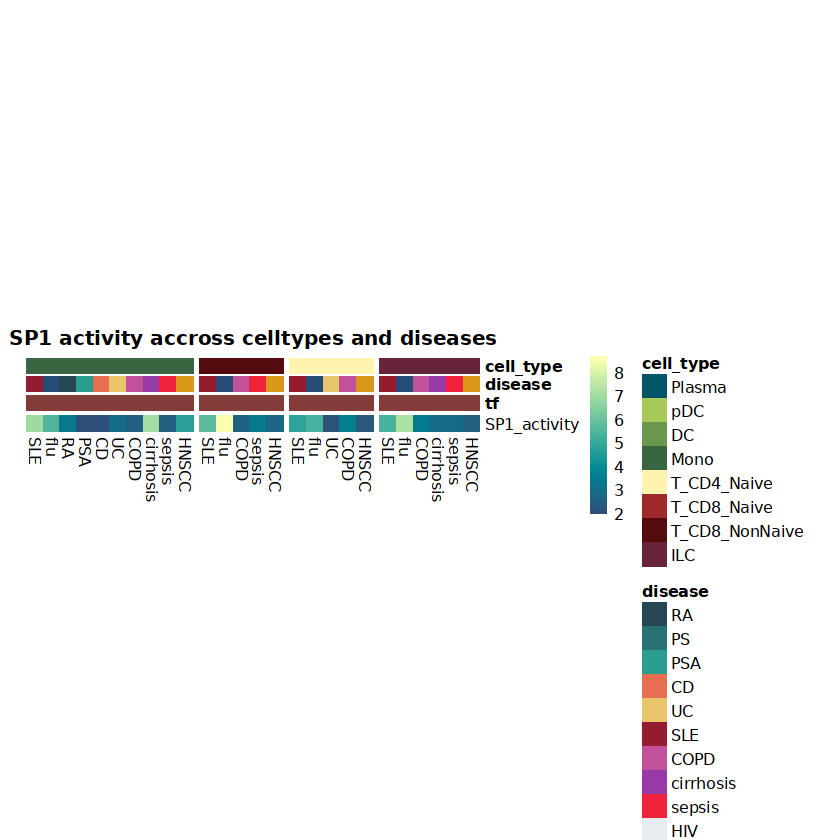

In [103]:
print(a)

In [104]:
# Extract cell types from column names (last part after colon)
col_cell_types <- sapply(strsplit(colnames(df_matrix), ":"), tail, 1)
unique_cell_types <- unique(col_cell_types)

# Initialize output (same shape)
df_scaled <- df_matrix

# Loop over each cell type
for (ct in unique_cell_types) {
  cols_in_ct <- which(col_cell_types == ct)
  values <- as.numeric(df_matrix[1, cols_in_ct])
  
  # Min-max scale within the cell type
  rng <- range(values, na.rm = TRUE)
  if (diff(rng) > 0) {
    df_scaled[1, cols_in_ct] <- (values - rng[1]) / diff(rng)
  } else {
    df_scaled[1, cols_in_ct] <- NA  # or 0 if you prefer
  }
}
df_scaled

,SPECTRA_46:SP1:SLE:Mono,SPECTRA_46:SP1:flu:Mono,SPECTRA_46:SP1:RA:Mono,SPECTRA_46:SP1:PSA:Mono,SPECTRA_46:SP1:CD:Mono,SPECTRA_46:SP1:UC:Mono,SPECTRA_46:SP1:COPD:Mono,SPECTRA_46:SP1:cirrhosis:Mono,SPECTRA_46:SP1:sepsis:Mono,SPECTRA_46:SP1:HNSCC:Mono,⋯,SPECTRA_71:SP1:flu:T_CD4_Naive,SPECTRA_71:SP1:UC:T_CD4_Naive,SPECTRA_71:SP1:COPD:T_CD4_Naive,SPECTRA_71:SP1:HNSCC:T_CD4_Naive,SPECTRA_34:SP1:SLE:ILC,SPECTRA_34:SP1:flu:ILC,SPECTRA_34:SP1:COPD:ILC,SPECTRA_34:SP1:cirrhosis:ILC,SPECTRA_34:SP1:sepsis:ILC,SPECTRA_34:SP1:HNSCC:ILC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP1_activity,0.974906,0.6940718,0.2585059,0.01667053,0,0.1900328,0.1058329,1,0.1157709,0.5324599,⋯,1,0,0.4591503,0.07206988,0.60803,1,0.2094029,0.1059271,0.1014725,0


In [105]:
figure_path <- paste0(outputpath, tf_name, "_activity_scaledbycelltype.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    df_scaled,
    border_color = NA,
    na_col = "white",
    color = hcl.colors(50, "BluYl"),
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0(tf_name, " activity across diseases, normalized by celltype"),
    #gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(10,15, 20)
    )
print(a)
dev.off()

pdf 
  4

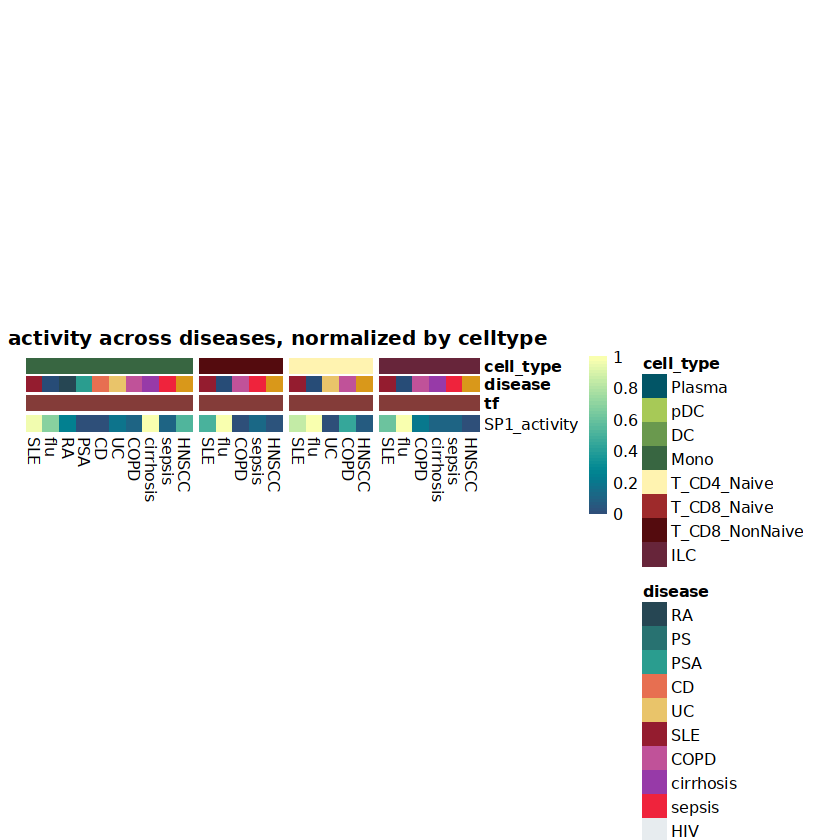

In [106]:
print(a)

### T-statistic

In [58]:
figure_path <- paste0(outputpath, tf_name, "_targets_tstatistic_heatmap.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    tf_xx,
    border_color = NA,
    na_col = "white",
    color = my_color,
    breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = paste0("relative expression of ", tf_name, " targets present in CellType IFN-response factor"),
    #gaps_row = c(9,10,12,13,14,32,35),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5,8, 10)
    gaps_col = c(10,15, 20)
    )
print(a)
dev.off()

pdf 
  4

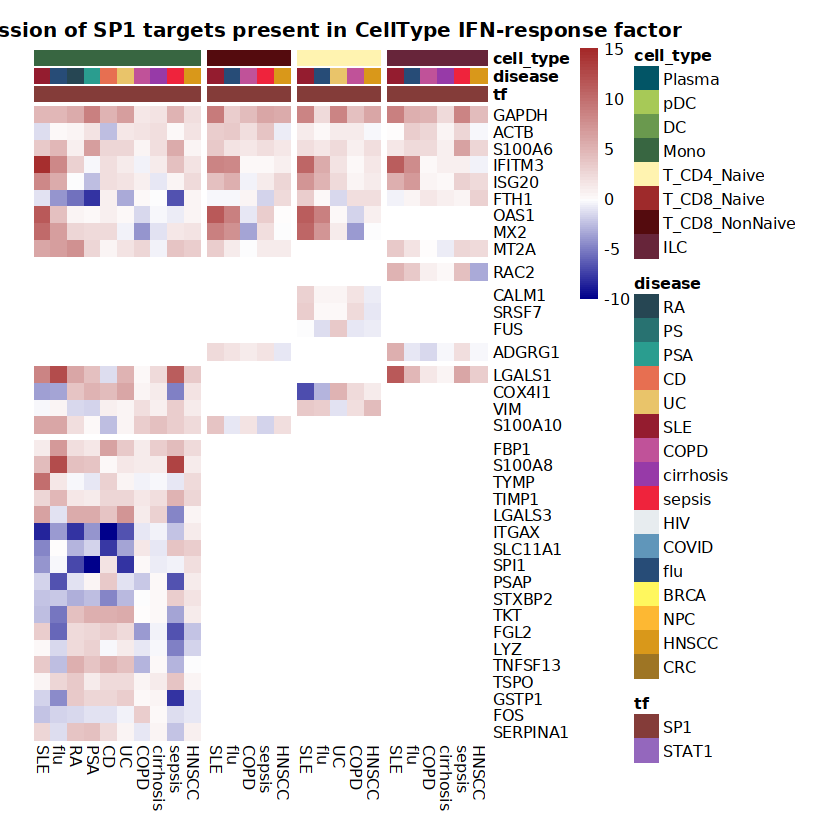

In [59]:
print(a)

### GEX

In [88]:
sp1_targets_order <- c(
  "GAPDH", "ACTB", "S100A6", "IFITM3", "ISG20", "FTH1",
  "OAS1", "MX2", "MT2A", "RAC2",
  "CALM1", "SRSF7", "FUS",
  "ADGRG1", "LGALS1",
  "COX4I1", "VIM", "S100A10",
  "FBP1", "S100A8", "TYMP", "TIMP1", "LGALS3", "ITGAX",
  "SLC11A1", "SPI1", "PSAP", "STXBP2", "TKT", "FGL2", "LYZ",
  "TNFSF13", "TSPO", "GSTP1", "FOS", "SERPINA1"
)

cell_type_order <- c("Mono", "T_CD8_NonNaive",  "T_CD4_Naive","ILC")

disease_order <- c(
    "healthy",
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

In [90]:
# 1. Extract normalized expression matrix
expr <- assay(sce, "X")

# 2. Map gene symbols to rownames
gene_symbols <- rowData(sce)$symbol
rownames(expr) <- gene_symbols

# 3. Subset expression matrix for selected genes
genes_to_use <- intersect(sp1_targets_order, gene_symbols)
expr_sub <- expr[genes_to_use, , drop = FALSE]

# 4. Extract and clean cell metadata
cell_meta <- as.data.frame(colData(sce))
cell_meta <- cell_meta %>%
  filter(Level1 %in% cell_type_order, disease %in% disease_order)

# 5. Subset columns of expression matrix to match filtered cells
expr_sub <- expr_sub[, rownames(cell_meta), drop = FALSE]

# 6. Create group label: celltype__disease
cell_meta$group <- paste0(cell_meta$Level1, "__", cell_meta$disease)

# 7. Compute mean expression per gene per group
df_long <- as.data.frame(t(expr_sub)) %>%
  mutate(group = cell_meta$group) %>%
  pivot_longer(cols = -group, names_to = "gene", values_to = "expr") %>%
  group_by(group, gene) %>%
  summarise(mean_expr = mean(expr, na.rm = TRUE), .groups = "drop")

# 8. Convert to wide format (genes as rows, groups as columns)
means_df <- df_long %>%
  pivot_wider(names_from = group, values_from = mean_expr)

# 9. Restore gene names as rownames and ensure correct row order
means_mat <- as.data.frame(means_df)
rownames(means_mat) <- means_mat$gene
means_mat <- means_mat[sp1_targets_order[sp1_targets_order %in% rownames(means_mat)], -1, drop = FALSE]

# 10. Create desired column order based on cell_type_order + disease_order
desired_col_order <- unlist(lapply(cell_type_order, function(ct) {
  sapply(disease_order, function(dz) paste0(ct, "__", dz))
}))
# Keep only existing columns in that order
desired_col_order <- desired_col_order[desired_col_order %in% colnames(means_mat)]
means_mat <- means_mat[, desired_col_order]

# Final matrix: genes (rows) x celltype__disease (columns)
means_mat

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__PS,Mono__PSA,Mono__CD,Mono__UC,Mono__MS,Mono__asthma,⋯,ILC__COPD,ILC__cirrhosis,ILC__sepsis,ILC__HIV,ILC__HBV,ILC__COVID,ILC__BRCA,ILC__NPC,ILC__HNSCC,ILC__CRC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,46.00822071,49.84543040,77.54184099,62.05991203,55.64518826,70.03293228,61.98198936,67.05048891,65.6343811,56.10555808,⋯,31.7371039,42.7220006,36.22127157,15.8900523,32.53009186,33.78038390,27.14104207,30.83787155,37.00337110,31.90654673
ACTB,204.73886094,187.67359070,263.09014615,144.06443686,149.00496908,153.21776551,117.35340336,150.95735550,202.1677002,226.91335678,⋯,191.2478930,164.6577625,264.40974426,75.8011030,157.03335012,257.13396252,134.80880864,176.11135864,184.52364640,132.13659069
S100A6,133.48654344,145.07656229,187.18161149,82.17397087,86.16998042,117.66604937,93.70210738,92.32997756,160.2266907,136.19134903,⋯,25.2566487,23.8044574,28.26777251,18.1319812,17.28359575,21.89755911,18.35998551,21.62012901,23.56080155,26.11745037
IFITM3,16.04204066,45.70987029,64.34285519,22.13998117,16.63583007,12.47132388,19.45485356,16.87811080,12.8557955,21.52802054,⋯,6.7469442,10.3043730,13.38768075,2.7978264,8.31334019,15.61943570,10.67748610,7.10092266,6.27475139,9.40373162
ISG20,0.67186011,1.44248285,1.75276548,1.00090999,0.83410893,0.80316598,1.17516642,1.16351873,0.4987325,0.76911565,⋯,6.9889906,9.7533461,7.07937766,4.5347846,9.08742208,7.25557723,6.78592372,6.10407405,6.74102613,6.02721684
FTH1,240.70133093,306.77567447,201.33634671,493.68374875,437.85460017,429.55624448,710.35403152,583.80587075,263.7869049,375.33315531,⋯,65.9586544,117.2266846,52.87443946,27.8625517,47.50059891,36.96282146,11.70071161,23.76095638,60.92406609,57.52714184
OAS1,1.67617076,2.59505789,3.66932561,0.62613475,0.60213247,0.55783482,0.71152297,0.61732151,1.5144569,2.43536472,⋯,0.5795930,0.4155121,0.90698421,0.8487245,0.32411163,1.23448070,0.99619288,0.68295247,0.48598622,0.49023244
MX2,1.59117532,2.34277595,3.56411704,1.77383366,1.72545188,1.68388179,1.71450579,1.19958205,1.2472913,2.50387174,⋯,0.5389661,0.4598597,0.75238040,1.6062696,0.44662156,1.19511830,0.93056468,0.52313127,0.48722918,0.66276582
MT2A,10.55497981,28.69654315,26.03144620,52.53457852,18.89128867,32.02638856,24.33669297,28.21211906,7.5309857,7.58244510,⋯,8.6219170,6.1242054,12.16794668,6.1711961,14.52914322,8.98707182,12.30905183,7.72102332,13.55562533,11.64275609


In [91]:
group_vector <- paste0(tf_df$cell_type, "__", tf_df$disease)
group_vector

[1] "Mono__SLE"              "Mono__flu"              "Mono__RA"              
 [4] "Mono__PSA"              "Mono__CD"               "Mono__UC"              
 [7] "Mono__COPD"             "Mono__cirrhosis"        "Mono__sepsis"          
[10] "Mono__HNSCC"            "T_CD8_NonNaive__SLE"    "T_CD8_NonNaive__flu"   
[13] "T_CD8_NonNaive__COPD"   "T_CD8_NonNaive__sepsis" "T_CD8_NonNaive__HNSCC" 
[16] "T_CD4_Naive__SLE"       "T_CD4_Naive__flu"       "T_CD4_Naive__UC"       
[19] "T_CD4_Naive__COPD"      "T_CD4_Naive__HNSCC"     "ILC__SLE"              
[22] "ILC__flu"               "ILC__COPD"              "ILC__cirrhosis"        
[25] "ILC__sepsis"            "ILC__HNSCC"

In [92]:
original_groups <- group_vector
cell_types <- sub("__.*", "", original_groups)
first_occurrence <- !duplicated(cell_types)
healthy_entries <- paste0(cell_types[first_occurrence], "__healthy")
valid_vector <- character(0)
insert_idx <- which(first_occurrence)
for (i in seq_along(original_groups)) {
  if (i %in% insert_idx) {
    valid_vector <- c(valid_vector, healthy_entries[which(insert_idx == i)])
  }
  valid_vector <- c(valid_vector, original_groups[i])
}
valid_vector

[1] "Mono__healthy"           "Mono__SLE"              
 [3] "Mono__flu"               "Mono__RA"               
 [5] "Mono__PSA"               "Mono__CD"               
 [7] "Mono__UC"                "Mono__COPD"             
 [9] "Mono__cirrhosis"         "Mono__sepsis"           
[11] "Mono__HNSCC"             "T_CD8_NonNaive__healthy"
[13] "T_CD8_NonNaive__SLE"     "T_CD8_NonNaive__flu"    
[15] "T_CD8_NonNaive__COPD"    "T_CD8_NonNaive__sepsis" 
[17] "T_CD8_NonNaive__HNSCC"   "T_CD4_Naive__healthy"   
[19] "T_CD4_Naive__SLE"        "T_CD4_Naive__flu"       
[21] "T_CD4_Naive__UC"         "T_CD4_Naive__COPD"      
[23] "T_CD4_Naive__HNSCC"      "ILC__healthy"           
[25] "ILC__SLE"                "ILC__flu"               
[27] "ILC__COPD"               "ILC__cirrhosis"         
[29] "ILC__sepsis"             "ILC__HNSCC"

In [93]:
gex_xx <- means_mat[, valid_vector, drop = FALSE]
head(gex_xx)

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__PSA,Mono__CD,Mono__UC,Mono__COPD,Mono__cirrhosis,Mono__sepsis,⋯,T_CD4_Naive__UC,T_CD4_Naive__COPD,T_CD4_Naive__HNSCC,ILC__healthy,ILC__SLE,ILC__flu,ILC__COPD,ILC__cirrhosis,ILC__sepsis,ILC__HNSCC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,46.0082207,49.845430,77.541841,62.05991,70.032932,61.981989,67.050489,60.356196,81.5645947,69.9730906,⋯,25.508936,30.287921,36.811513,25.282590,28.835946,40.00782,31.737104,42.722001,36.221272,37.003371
ACTB,204.7388609,187.673591,263.090146,144.06444,153.217766,117.353403,150.957355,239.857302,264.5573139,238.6788426,⋯,60.573458,140.492270,133.415579,194.338969,172.521478,340.69215,191.247893,164.657763,264.409744,184.523646
S100A6,133.4865434,145.076562,187.181611,82.17397,117.666049,93.702107,92.329978,142.991900,162.5766411,177.6639982,⋯,20.342295,30.761494,28.359590,20.614486,24.042433,24.18348,25.256649,23.804457,28.267773,23.560802
IFITM3,16.0420407,45.709870,64.342855,22.13998,12.471324,19.454854,16.878111,25.682269,30.8610551,32.7427952,⋯,1.883511,2.290600,2.529262,6.852019,12.807914,20.54933,6.746944,10.304373,13.387681,6.274751
ISG20,0.6718601,1.442483,1.752765,1.00091,0.803166,1.175166,1.163519,1.141702,0.7056194,0.9239105,⋯,8.067330,8.954684,8.964015,6.061472,8.704765,9.48339,6.988991,9.753346,7.079378,6.741026
FTH1,240.7013309,306.775674,201.336347,493.68375,429.556244,710.354032,583.805871,388.458906,403.8095703,212.0594879,⋯,162.193515,110.420371,88.385808,43.879145,64.008203,41.18818,65.958654,117.226685,52.874439,60.924066


In [94]:
# Extract cell types from colnames
cell_types <- sub("__.*", "", colnames(gex_xx))
unique_cell_types <- unique(cell_types)

# Initialize output matrix
gex_xx_scaled <- gex_xx  # will hold scaled values

# Loop through each cell type
for (ct in unique_cell_types) {
  cols_in_ct <- which(cell_types == ct)
  
  # Subset the matrix for this cell type
  submatrix <- gex_xx[, cols_in_ct, drop = FALSE]
  
  # Apply min-max scaling row-wise
  scaled_submatrix <- t(apply(submatrix, 1, function(x) {
    rng <- range(x, na.rm = TRUE)
    if (diff(rng) == 0 || all(is.na(x))) {
      return(rep(NA, length(x)))  # avoid divide by 0 or all NA
    } else {
      return((x - rng[1]) / diff(rng))
    }
  }))
  
  # Replace in the output
  gex_xx_scaled[, cols_in_ct] <- scaled_submatrix
}

In [95]:
head(gex_xx_scaled)

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__PSA,Mono__CD,Mono__UC,Mono__COPD,Mono__cirrhosis,Mono__sepsis,⋯,T_CD4_Naive__UC,T_CD4_Naive__COPD,T_CD4_Naive__HNSCC,ILC__healthy,ILC__SLE,ILC__flu,ILC__COPD,ILC__cirrhosis,ILC__sepsis,ILC__HNSCC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,0.0000000,0.1079190,0.8868627,0.4514434,0.6756795,0.4492519,0.59180017,0.4035275,1.0000000,0.67399645,⋯,0.1091749,0.37937132,0.7482051,0.00000000,0.20375438,0.8443651,0.37011080,1.0000000,0.6272392,0.6720859
ACTB,0.5936354,0.4777060,0.9900331,0.1814560,0.2436373,0.0000000,0.22828165,0.8322055,1.0000000,0.82419984,⋯,0.0000000,0.44096806,0.4019210,0.16861027,0.04467147,1.0000000,0.15105077,0.0000000,0.5666619,0.1128523
S100A6,0.4886556,0.5990287,1.0000000,0.0000000,0.3379952,0.1097838,0.09671684,0.5791762,0.7656840,0.90936266,⋯,0.0000000,1.00000000,0.7694733,0.00000000,0.44790522,0.4663344,0.60655805,0.4168106,1.0000000,0.3849739
IFITM3,0.0688377,0.6407859,1.0000000,0.1863962,0.0000000,0.1346313,0.08495579,0.2546859,0.3545245,0.39080148,⋯,0.0000000,0.07565919,0.1200154,0.04044028,0.45767815,1.0000000,0.03307928,0.2822936,0.4982935,0.0000000
ISG20,0.0000000,0.7129419,1.0000000,0.3044206,0.1214777,0.4656340,0.45485815,0.4346740,0.0312324,0.23318452,⋯,0.0000000,0.27428162,0.2771658,0.00000000,0.71597608,0.9268783,0.25123255,1.0000000,0.2757153,0.1840676
FTH1,0.0773352,0.2071428,0.0000000,0.5743364,0.4483536,1.0000000,0.75138750,0.3676150,0.3977725,0.02106634,⋯,1.0000000,0.42320612,0.1777236,0.03538953,0.30011143,0.0000000,0.32576227,1.0000000,0.1536887,0.2595512


In [96]:
head(tf_xx)

,SPECTRA_46:SP1:SLE:Mono,SPECTRA_46:SP1:flu:Mono,SPECTRA_46:SP1:RA:Mono,SPECTRA_46:SP1:PSA:Mono,SPECTRA_46:SP1:CD:Mono,SPECTRA_46:SP1:UC:Mono,SPECTRA_46:SP1:COPD:Mono,SPECTRA_46:SP1:cirrhosis:Mono,SPECTRA_46:SP1:sepsis:Mono,SPECTRA_46:SP1:HNSCC:Mono,⋯,SPECTRA_71:SP1:flu:T_CD4_Naive,SPECTRA_71:SP1:UC:T_CD4_Naive,SPECTRA_71:SP1:COPD:T_CD4_Naive,SPECTRA_71:SP1:HNSCC:T_CD4_Naive,SPECTRA_34:SP1:SLE:ILC,SPECTRA_34:SP1:flu:ILC,SPECTRA_34:SP1:COPD:ILC,SPECTRA_34:SP1:cirrhosis:ILC,SPECTRA_34:SP1:sepsis:ILC,SPECTRA_34:SP1:HNSCC:ILC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,4.654,4.769,5.726,8.606,5.208,6.741,1.285,1.779,4.948,2.136,⋯,2.314,8.488,4.300,6.080,8.815,5.300,5.124,2.227,8.492,4.506
ACTB,-1.219,0.112,0.631,1.712,-2.485,1.342,1.806,1.906,0.216,1.585,⋯,0.091,1.241,1.109,-0.200,0.022,3.170,2.743,0.369,2.536,-0.307
S100A6,3.706,4.753,0.945,6.520,2.753,2.512,0.558,2.101,5.618,0.647,⋯,1.326,2.479,0.892,1.931,1.456,2.346,2.240,0.806,6.385,2.680
IFITM3,14.529,8.216,3.016,-0.229,2.084,1.200,-0.546,1.188,4.086,1.634,⋯,5.769,1.635,0.199,1.312,11.262,7.701,0.056,0.774,0.834,-0.511
ISG20,7.996,5.789,-0.084,-2.411,1.913,1.707,0.797,-0.976,0.582,2.451,⋯,5.178,2.392,0.626,1.026,5.394,6.943,0.474,0.107,2.852,2.464
FTH1,-1.180,-4.109,-5.568,-7.854,0.863,-3.298,0.249,-0.095,-6.609,0.514,⋯,0.219,-1.597,1.953,2.169,-0.550,0.606,1.345,0.846,0.405,3.074


In [97]:
# Step 1: Extract cell types from colnames (last element after ":")
cell_types <- sapply(strsplit(colnames(tf_xx), ":"), tail, 1)
unique_cell_types <- unique(cell_types)

# Step 2: For each gene, check which cell types have all NA values
na_celltypes_per_gene <- lapply(rownames(tf_xx), function(gene) {
  gene_row <- tf_xx[gene, ]
  
  # For each unique cell type, check if all values are NA
  cell_types_with_all_na <- unique_cell_types[
    sapply(unique_cell_types, function(ct) {
      all(is.na(gene_row[cell_types == ct]))
    })
  ]
  
  return(cell_types_with_all_na)
})

# Step 3: Name the list by gene
names(na_celltypes_per_gene) <- rownames(tf_xx)
na_celltypes_per_gene

$GAPDH
character(0)

$ACTB
character(0)

$S100A6
character(0)

$IFITM3
character(0)

$ISG20
character(0)

$FTH1
character(0)

$OAS1
[1] "ILC"

$MX2
[1] "ILC"

$MT2A
[1] "T_CD4_Naive"

$RAC2
[1] "Mono"           "T_CD8_NonNaive" "T_CD4_Naive"   

$CALM1
[1] "Mono"           "T_CD8_NonNaive" "ILC"           

$SRSF7
[1] "Mono"           "T_CD8_NonNaive" "ILC"           

$FUS
[1] "Mono"           "T_CD8_NonNaive" "ILC"           

$ADGRG1
[1] "Mono"        "T_CD4_Naive"

$LGALS1
[1] "T_CD8_NonNaive" "T_CD4_Naive"   

$COX4I1
[1] "T_CD8_NonNaive" "ILC"           

$VIM
[1] "T_CD8_NonNaive" "ILC"           

$S100A10
[1] "T_CD4_Naive" "ILC"        

$FBP1
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$S100A8
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$TYMP
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$TIMP1
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$LGALS3
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$ITGAX
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$SLC11A1
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$SPI1
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$PSAP
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$STXBP2
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$TKT
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$FGL2
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$LYZ
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$TNFSF13
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$TSPO
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$GSTP1
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$FOS
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"           

$SERPINA1
[1] "T_CD8_NonNaive" "T_CD4_Naive"    "ILC"

In [98]:
# Make a copy to modify
gex_xx_cleaned <- gex_xx

# Loop over each gene
for (gene in rownames(gex_xx_cleaned)) {
  # Get list of cell types to blank out for this gene
  na_celltypes <- na_celltypes_per_gene[[gene]]
  
  if (length(na_celltypes) > 0) {
    # For each cell type, find columns starting with "celltype__"
    cols_to_na <- unlist(lapply(na_celltypes, function(ct) {
      grep(paste0("^", ct, "__"), colnames(gex_xx_cleaned), value = TRUE)
    }))
    
    # Set those columns to NA for this gene
    gex_xx_cleaned[gene, cols_to_na] <- NA
  }
}

In [99]:
# Make a copy to modify
gex_xx_scaled_cleaned <- gex_xx_scaled

# Loop over each gene
for (gene in rownames(gex_xx_cleaned)) {
  # Get list of cell types to blank out for this gene
  na_celltypes <- na_celltypes_per_gene[[gene]]
  
  if (length(na_celltypes) > 0) {
    # For each cell type, find columns starting with "celltype__"
    cols_to_na <- unlist(lapply(na_celltypes, function(ct) {
      grep(paste0("^", ct, "__"), colnames(gex_xx_scaled_cleaned), value = TRUE)
    }))
    
    # Set those columns to NA for this gene
    gex_xx_scaled_cleaned[gene, cols_to_na] <- NA
  }
}

In [100]:
group_ids <- colnames(gex_xx)
split_info <- strsplit(group_ids, "__")
ids_df <- data.frame(
  group = group_ids,
  tf = "SP1",
  disease = sapply(split_info, `[`, 2),
  cell_type = sapply(split_info, `[`, 1),
  stringsAsFactors = FALSE
)
ids_df <- ids_df %>%
  mutate(
    tf = factor(tf),
    disease = factor(disease),
    cell_type = factor(cell_type)
  )
rownames(ids_df) <- ids_df$group
ids_df <- ids_df[, !(colnames(ids_df) == "group"), drop = FALSE]
head(ids_df)

,tf,disease,cell_type
,<fct>,<fct>,<fct>
Mono__healthy,SP1,healthy,Mono
Mono__SLE,SP1,SLE,Mono
Mono__flu,SP1,flu,Mono
Mono__RA,SP1,RA,Mono
Mono__PSA,SP1,PSA,Mono
Mono__CD,SP1,CD,Mono


In [101]:
# Colors
my_colour_annot <- list(
    tf = tfs_colors[names(tfs_colors) %in% levels(ids_df$tf)],
    disease = disease_colors[names(disease_colors) %in% levels(ids_df$disease)],
    cell_type = cell_colors[names(cell_colors) %in% levels(ids_df$cell_type)]
)

In [102]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_raw.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_cleaned,
    border_color = NA,
    na_col = "white",
    #scale = "row", 
    #color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(11,17, 23)
    )
print(a)
dev.off()

pdf 
  4

In [103]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_scaled_bygene.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_cleaned,
    border_color = NA,
    na_col = "white",
    scale = "row", 
    color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(11,17, 23)
    )
print(a)
dev.off()

pdf 
  4

In [104]:
figure_path <- paste0(outputpath, tf_name, "_targets_gex_heatmap_scaledmaxmin.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    gex_xx_scaled_cleaned,
    border_color = NA,
    na_col = "white",
    #scale = "row", 
    #color = my_color,
    #breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = ids_df,
    cex = 1,
    fontsize = 9,
    labels_col = ids_df$disease,
    filename = figure_path,
    main = paste0("GEX expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(11,17, 23)
    )
print(a)
dev.off()

pdf 
  4

In [108]:
rownames(gex_xx_scaled_cleaned)

[1] "GAPDH"    "ACTB"     "S100A6"   "IFITM3"   "ISG20"    "FTH1"    
 [7] "OAS1"     "MX2"      "MT2A"     "RAC2"     "CALM1"    "SRSF7"   
[13] "FUS"      "ADGRG1"   "LGALS1"   "COX4I1"   "VIM"      "S100A10" 
[19] "FBP1"     "S100A8"   "TYMP"     "TIMP1"    "LGALS3"   "ITGAX"   
[25] "SLC11A1"  "SPI1"     "PSAP"     "STXBP2"   "TKT"      "FGL2"    
[31] "LYZ"      "TNFSF13"  "TSPO"     "GSTP1"    "FOS"      "SERPINA1"

In [107]:
ids_df

,tf,disease,cell_type
,<fct>,<fct>,<fct>
Mono__healthy,SP1,healthy,Mono
Mono__SLE,SP1,SLE,Mono
Mono__flu,SP1,flu,Mono
Mono__RA,SP1,RA,Mono
Mono__PSA,SP1,PSA,Mono
Mono__CD,SP1,CD,Mono
Mono__UC,SP1,UC,Mono
Mono__COPD,SP1,COPD,Mono
Mono__cirrhosis,SP1,cirrhosis,Mono


In [85]:
#library(dittoSeq)
library(scater)
library(patchwork)
library(cowplot)
library(viridis)

Loading required package: scuttle


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:ggpubr’:

    get_legend


Loading required package: viridisLite



In [ ]:
stat1_targets_order <- c('IFI27', 'IFI6', 'MX1', 'ISG15',  'IFITM1', 'OAS1', "ISG20", "ADAR", "IFIT3","IFIT1",
                         'IFIT2','VIM',  'S100A10', 'PRF1', 'UPP1', 'TIMP1', 'LGALS3', 'LAP3',
                         'LY96', 'CD86', 'FGL2', 'FOS')

In [87]:
library(scuttle)
sce$group <- paste0(sce$Level1, "__", sce$disease)

In [88]:
sce

class: SingleCellExperiment 
dim: 8253 10313 
metadata(4): Factor_markers Gene_Weights Gene_selection_parameters
  Input_signatures
assays(1): X
rownames(8253): ENSG00000000003 ENSG00000000457 ... ENSG00000280789
  ENSG00000282608
rowData names(5): hgnc_id symbol locus_group HUGO_status
  SPECTRA_selected_genes
colnames(10313): Perez2022_1368_T0_B-0 Perez2022_1368_T0_DC-0 ...
  Terekhova2023_B17_T0_Cycling_cells-1
  Terekhova2023_B17_T0_Progenitors-1
colData names(10): studyID sampleID ... diseaseGroup group
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [86]:
library(scuttle)
sce$group <- paste0(sce$Level1, "__", sce$disease)
celltype_mean <- aggregateAcrossCells(sce,  
                     ids = sce$group, 
                     statistics = "mean",
                     use.assay.type = "exprs", 
                     subset.row = stat1_targets_order)

In [ ]:
library(scuttle)
sce$group <- paste0(sce$Level1, "__", sce$disease)
celltype_mean <- aggregateAcrossCells(sce,  
                     ids = sce$group, 
                     statistics = "mean",
                     use.assay.type = "exprs", 
                     subset.row = stat1_targets_order)

In [90]:
expr

,Perez2022_1368_T0_B-0,Perez2022_1368_T0_DC-0,Perez2022_1368_T0_ILC-0,Perez2022_1368_T0_Mono-0,Perez2022_1368_T0_T_CD4_Naive-0,Perez2022_1368_T0_T_CD4_NonNaive-0,Perez2022_1368_T0_T_CD8_Naive-0,Perez2022_1368_T0_T_CD8_NonNaive-0,Perez2022_1368_T0_UTC-0,Perez2022_1368_T0_pDC-0,⋯,Perez2022_1737_T0_Cycling_cells-1,Perez2022_1737_T0_Progenitors-1,COMBAT2022_S00148_T0_Cycling_cells-1,COMBAT2022_S00148_T0_Progenitors-1,Perez2022_1341_T0_Cycling_cells-1,Perez2022_1341_T0_Progenitors-1,Terekhova2023_A33_T1_Cycling_cells-1,Terekhova2023_A33_T1_Progenitors-1,Terekhova2023_B17_T0_Cycling_cells-1,Terekhova2023_B17_T0_Progenitors-1
TSPAN6,0.004946078,0.001517814,0.004874117,0.001215615,0.06336176,0.02302758,0.05852912,0.01124645,0.01762693,0.003264921,⋯,0.005804385,0.02720720,0.004050451,0.03390880,0.004694596,0.02670602,0.009477445,0.02971054,0.005242877,0.03269117
SCYL3,0.351811051,0.193479255,0.295218647,0.225949869,0.46947551,0.38572648,0.43377486,0.31049904,0.33660614,0.717654288,⋯,0.356193781,0.58559644,0.382688046,0.68142509,0.395714849,0.40950546,0.161650538,0.25300092,0.149462581,0.26587385
FGR,1.583622694,4.222432137,3.681834698,6.019977570,0.33284017,0.58789682,0.30726069,1.84996462,1.38735199,0.202164695,⋯,1.121519327,0.16385384,1.217050076,0.25384444,1.760638833,0.22279873,1.319077373,0.29197994,1.121336937,0.34026527
CFH,0.005273994,0.007151030,0.047905475,0.006217299,0.02155399,0.32516739,0.01860256,0.27476475,0.24035387,0.006429998,⋯,0.014069556,0.83302200,0.027621649,0.94718093,0.079472259,0.71167535,0.034641068,0.53729588,0.019970061,0.72879666
FUCA2,0.203838825,0.797108054,0.428794295,0.735272646,0.17694238,0.25775871,0.14254251,0.24407288,0.25838742,0.223488927,⋯,0.363750279,0.65092027,0.734384298,0.89013666,0.399623126,0.62808621,0.430523992,0.64906615,0.496437758,0.70940387
GCLC,0.134933025,0.367357910,0.248909101,0.224304318,0.14968073,0.17122266,0.17230740,0.22161658,0.22773653,0.307406873,⋯,0.162415653,0.31918710,0.141214833,0.31128445,0.224071562,0.56088376,0.374137402,0.73947233,0.369269222,0.96180391
NFYA,0.216083065,0.092870526,0.149691388,0.117500938,0.18545711,0.16274850,0.18528172,0.16656123,0.19038238,0.288906664,⋯,0.150622040,0.21051636,0.244059116,0.37355712,0.188524619,0.25283653,0.237855002,0.28832108,0.256616384,0.39099780
STPG1,0.114652157,0.032596145,0.033872571,0.019312965,0.13519320,0.09185548,0.12579185,0.06829756,0.07568330,0.092887975,⋯,0.089391485,0.19052520,0.095044181,0.18408673,0.079760194,0.16517083,0.077319302,0.12094364,0.072324730,0.12147437
NIPAL3,0.382595211,0.172743812,0.387574971,0.075300470,1.17112947,0.75052202,1.12437141,0.50114471,0.58553541,0.420058370,⋯,0.544644892,0.41858470,0.644532204,0.72670823,0.447569013,0.49138182,0.821966350,0.55894393,0.630525529,0.67260563
ENPP4,0.260468423,0.221957907,0.976393104,0.090000898,0.21217789,0.33373272,0.25108364,0.76065063,0.56970567,0.342002004,⋯,0.178084746,0.16618082,0.391658157,0.40826711,0.485539556,0.55865496,0.292072684,0.33522075,0.315240800,0.50798917


In [ ]:
BiocManager::install("dittoSeq")

In [ ]:
library(dittoSeq)
dittoHeatmap(celltype_mean,
             assay = "exprs", 
             cluster_cols = TRUE, 
             scale = "none",
             heatmap.colors = viridis(100),
             annot.by = c("Level1", "disease"),
             annotation_colors = list(Level1 = cell_colors,
                                      disease = disease_colors))

In [76]:
library(dplyr)
library(tidyr)

# Define gene list and desired orderings
stat1_targets_order <- c('IFI27', 'IFI6', 'MX1', 'ISG15',  'IFITM1', 'OAS1', "ISG20", "ADAR", "IFIT3","IFIT1",
                         'IFIT2','VIM',  'S100A10', 'PRF1', 'UPP1', 'TIMP1', 'LGALS3', 'LAP3',
                         'LY96', 'CD86', 'FGL2', 'FOS')

cell_type_order <- c("Mono", "T_CD8_Naive", "T_CD8_NonNaive", "pDC", "DC", "Plasma")

disease_order <- c("healthy", "SLE", "flu", "RA", "PS", "PSA", "CD", "UC", "MS",
                   "asthma", "COPD", "cirrhosis", "sepsis", "HIV", "HBV", "COVID",
                   "BRCA", "NPC", "HNSCC", "CRC")

# 1. Extract normalized expression matrix
expr <- assay(sce, "X")

# 2. Map gene symbols to rownames
gene_symbols <- rowData(sce)$symbol
rownames(expr) <- gene_symbols

# 3. Subset expression matrix for selected genes
genes_to_use <- intersect(stat1_targets_order, gene_symbols)
expr_sub <- expr[genes_to_use, , drop = FALSE]

# 4. Extract and clean cell metadata
cell_meta <- as.data.frame(colData(sce))
cell_meta <- cell_meta %>%
  filter(Level1 %in% cell_type_order, disease %in% disease_order)

# 5. Subset columns of expression matrix to match filtered cells
expr_sub <- expr_sub[, rownames(cell_meta), drop = FALSE]

# 6. Create group label: celltype__disease
cell_meta$group <- paste0(cell_meta$Level1, "__", cell_meta$disease)

# 7. Compute mean expression per gene per group
df_long <- as.data.frame(t(expr_sub)) %>%
  mutate(group = cell_meta$group) %>%
  pivot_longer(cols = -group, names_to = "gene", values_to = "expr") %>%
  group_by(group, gene) %>%
  summarise(mean_expr = mean(expr, na.rm = TRUE), .groups = "drop")

# 8. Convert to wide format (genes as rows, groups as columns)
means_df <- df_long %>%
  pivot_wider(names_from = group, values_from = mean_expr)

# 9. Restore gene names as rownames and ensure correct row order
means_mat <- as.data.frame(means_df)
rownames(means_mat) <- means_mat$gene
means_mat <- means_mat[stat1_targets_order[stat1_targets_order %in% rownames(means_mat)], -1, drop = FALSE]

# 10. Create desired column order based on cell_type_order + disease_order
desired_col_order <- unlist(lapply(cell_type_order, function(ct) {
  sapply(disease_order, function(dz) paste0(ct, "__", dz))
}))
# Keep only existing columns in that order
desired_col_order <- desired_col_order[desired_col_order %in% colnames(means_mat)]
means_mat <- means_mat[, desired_col_order]

# Final matrix: genes (rows) x celltype__disease (columns)
means_mat

,Mono__healthy,Mono__SLE,Mono__flu,Mono__RA,Mono__PS,Mono__PSA,Mono__CD,Mono__UC,Mono__MS,Mono__asthma,⋯,Plasma__COPD,Plasma__cirrhosis,Plasma__sepsis,Plasma__HIV,Plasma__HBV,Plasma__COVID,Plasma__BRCA,Plasma__NPC,Plasma__HNSCC,Plasma__CRC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IFI27,0.5680440,12.7940734,19.3787875,0.6019423,0.2788973,0.37060174,0.7154109,0.5650863,0.08001578,0.5488176,⋯,0.18848770,0.23742774,1.68044348,2.6568084,0.03882512,3.83195365,0.73890040,0.27890057,0.29643856,0.37587532
IFI6,3.3942252,15.7695980,16.9931788,4.5120659,2.7098491,2.40883581,4.2556415,2.4152116,3.27978473,3.9891223,⋯,2.25723623,2.05557711,4.14598022,4.9432611,0.83516113,5.49899855,3.04399859,2.13456962,2.69750794,2.29313391
MX1,1.2403748,2.8826384,5.9922935,1.1371200,1.1945945,1.02140815,1.0857963,1.0446208,0.71720659,2.2875457,⋯,1.60036602,1.02146462,1.85498282,2.2811246,0.66617981,2.91711391,3.01789219,1.47527039,1.12262323,1.21163076
ISG15,3.4356079,14.7023425,14.1578465,3.4658376,3.3210189,2.09721308,3.6060080,3.0856261,2.86639578,3.5553870,⋯,3.25287060,2.50824542,3.07274882,4.8684964,3.47244054,4.60604895,4.34257832,5.94392262,3.59117756,2.70885259
IFITM1,1.9768815,4.4608389,13.4212473,0.9994931,2.8725660,1.61993259,1.6091440,2.0355672,0.59053345,0.5274391,⋯,4.05558574,1.44861161,4.87467346,1.4358235,2.17063167,5.55865393,4.13321443,3.51778096,2.21278282,2.63574478
OAS1,1.6761708,2.5950579,3.6693256,0.6261347,0.6021325,0.55783482,0.7115230,0.6173215,1.51445692,2.4353647,⋯,1.66934672,1.25043929,1.63936574,1.1030250,1.07219303,2.13517813,2.78659275,1.98238413,1.35518801,1.44309221
ISG20,0.6718601,1.4424829,1.7527655,1.0009100,0.8341089,0.80316598,1.1751664,1.1635187,0.49873252,0.7691157,⋯,23.68421676,22.69800282,18.92850021,12.9864616,22.45960668,21.70997674,27.25551758,26.20306416,21.64269453,18.85960773
ADAR,2.3526981,2.5386795,2.9400898,2.6500992,3.2505128,2.76637590,2.9143757,2.7396983,2.53950982,2.6440286,⋯,1.74287729,1.65293775,1.27092077,3.2584390,1.14124930,1.69230648,2.58935623,1.56525161,1.39437308,1.82894637
IFIT3,0.5452371,1.4607259,3.0882663,0.3849164,0.5223297,0.30903353,0.6177908,0.4236832,0.41716604,1.1282505,⋯,0.08547442,0.02944068,0.08574763,0.1594493,0.04512032,0.13846258,0.06933533,0.09852148,0.03542417,0.04937341


In [91]:
expr_sub

,Perez2022_1368_T0_DC-0,Perez2022_1368_T0_Mono-0,Perez2022_1368_T0_T_CD8_Naive-0,Perez2022_1368_T0_T_CD8_NonNaive-0,Perez2022_1368_T0_pDC-0,Perez2022_1848_T0_DC-0,Perez2022_1848_T0_Mono-0,Perez2022_1848_T0_Plasma-0,Perez2022_1848_T0_T_CD8_Naive-0,Perez2022_1848_T0_T_CD8_NonNaive-0,⋯,Terekhova2023_B01_T0_Plasma-0,Terekhova2023_B01_T0_T_CD8_Naive-0,Terekhova2023_B01_T0_T_CD8_NonNaive-0,Terekhova2023_B01_T0_pDC-0,Terekhova2023_B19_T0_DC-0,Terekhova2023_B19_T0_Mono-0,Terekhova2023_B19_T0_Plasma-0,Terekhova2023_B19_T0_T_CD8_Naive-0,Terekhova2023_B19_T0_T_CD8_NonNaive-0,Terekhova2023_B19_T0_pDC-0
IFI27,0.92589843,3.4869139,1.13170886,1.8498932,0.66738725,1.00789726,1.62111247,0.30598444,0.52733535,0.93587095,⋯,0.12917319,0.04815295,0.06777596,0.10758278,0.01911609,0.02312468,0.04802736,0.04101244,0.06496269,0.041777764
IFI6,4.12848473,9.4442749,5.09738255,4.8495040,0.30127105,4.15656614,6.36498690,1.67351711,3.69938946,3.69574189,⋯,1.72496319,2.16808486,1.91615748,0.21093814,1.25017154,2.12916303,1.13749671,2.16600227,1.72111273,0.108115755
MX1,1.31902063,1.7410015,1.54446483,1.1141113,3.29044795,1.97695816,1.42433929,0.74190891,1.26686168,1.38309610,⋯,0.95377773,1.11307561,0.88108748,4.22749186,0.94767565,0.96257704,0.62428123,1.00488257,0.80953872,2.612817764
ISG15,4.50140572,9.7695360,5.15571594,5.2435064,1.73720682,4.59920454,5.97215748,3.03227615,3.73796511,4.55713272,⋯,2.12968659,1.97693515,2.14926410,1.05273259,1.35114276,2.01556587,1.98148012,1.81549680,1.89705932,0.611810207
IFITM1,1.24818158,2.2632742,23.35264015,18.7113857,0.25774178,1.03069782,1.21385324,0.75839031,13.75749016,11.46451855,⋯,4.23729992,46.50360489,39.64913177,0.44162115,0.89500076,1.02404881,2.53253365,42.41905975,36.44475555,0.199222282
OAS1,1.00383306,2.2405667,0.39083487,0.6136047,2.19336629,1.16192997,2.08897257,0.91679728,0.34325197,0.63583124,⋯,1.56111622,0.19416909,0.34289083,2.06273532,0.83382869,1.41960692,2.12195706,0.16357459,0.32377589,1.970654607
ISG20,0.88546348,0.9710212,11.38027000,6.7287517,2.31361842,0.88863516,0.68472493,14.80069160,9.74519920,7.90178585,⋯,17.47438431,9.10137844,6.37334490,2.33355951,0.58640385,0.34752321,20.88587379,7.77775955,5.35569286,1.747153997
ADAR,1.54315305,2.2335963,3.09185004,2.7212260,2.18117666,1.97782075,2.44052553,1.61543012,3.25433350,3.30819273,⋯,1.28627598,2.96592355,2.74253511,2.71964574,1.71930540,2.35996103,1.30294025,3.01027966,2.73800683,2.131388426
IFIT3,0.20236892,0.8234178,0.18917793,0.3662502,0.09047052,0.29999220,0.69886380,0.04699741,0.15824054,0.32150358,⋯,0.05407219,0.06052770,0.10757065,0.06784625,0.11932806,0.33417308,0.04902029,0.03581246,0.07246183,0.033620398
IFIT1,0.08983281,0.3389696,0.13266167,0.1210051,0.01508684,0.13180111,0.25201154,0.04620728,0.10713121,0.10508672,⋯,0.06995628,0.08800513,0.06246636,0.01865219,0.04657244,0.12492207,0.03827060,0.05390701,0.03720166,0.007263223


In [81]:
figure_path <- paste0(outputpath,  tf_name,"_arget_genes_expression_heatmap.pdf")
pdf(figure_path, width = 15, height = 12)
a <- pheatmap::pheatmap(
    means_mat,
    border_color = NA,
    na_col = "white",
    color = my_color,
    breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    #main = paste0("relative expression of ", tf_name, " targets present in CellType IFN-response factor"),
    gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    #gaps_col = c(9, 13, 20, 30, 38)
    )
print(a)
dev.off()

pdf 
  4

In [82]:
my_breaks

[1] -10.0000000  -9.8000000  -9.6000000  -9.4000000  -9.2000000  -9.0000000
  [7]  -8.8000000  -8.6000000  -8.4000000  -8.2000000  -8.0000000  -7.8000000
 [13]  -7.6000000  -7.4000000  -7.2000000  -7.0000000  -6.8000000  -6.6000000
 [19]  -6.4000000  -6.2000000  -6.0000000  -5.8000000  -5.6000000  -5.4000000
 [25]  -5.2000000  -5.0000000  -4.8000000  -4.6000000  -4.4000000  -4.2000000
 [31]  -4.0000000  -3.8000000  -3.6000000  -3.4000000  -3.2000000  -3.0000000
 [37]  -2.8000000  -2.6000000  -2.4000000  -2.2000000  -2.0000000  -1.8000000
 [43]  -1.6000000  -1.4000000  -1.2000000  -1.0000000  -0.8000000  -0.6000000
 [49]  -0.4000000  -0.2000000   0.0000000   0.0500000   0.3551020   0.6602041
 [55]   0.9653061   1.2704082   1.5755102   1.8806122   2.1857143   2.4908163
 [61]   2.7959184   3.1010204   3.4061224   3.7112245   4.0163265   4.3214286
 [67]   4.6265306   4.9316327   5.2367347   5.5418367   5.8469388   6.1520408
 [73]   6.4571429   6.7622449   7.0673469   7.3724490   7.6775510   7.9826531
 [79]   8.2877551   8.5928571   8.8979592   9.2030612   9.5081633   9.8132653
 [85]  10.1183673  10.4234694  10.7285714  11.0336735  11.3387755  11.6438776
 [91]  11.9489796  12.2540816  12.5591837  12.8642857  13.1693878  13.4744898
 [97]  13.7795918  14.0846939  14.3897959  14.6948980  15.0000000

In [5]:
perez2022_l1 <- read.csv(inputpath_perez2022_level1, header = TRUE, row.names = 1)
scgt00_l1 <- read.csv(inputpath_scgt00_level1, header = TRUE, row.names = 1)
perez2022 <- read.csv(inputpath_perez2022, header = TRUE, row.names = 1)
scgt00 <- read.csv(inputpath_scgt00, header = TRUE, row.names = 1)
source(color_palette_path)

In [11]:
SLE_metadata = read.csv(inputpath_sle_metadata, header = TRUE, row.names = 1)
print(head(SLE_metadata))

                  SLEDAI_score Flare Responder   studyID
Perez2022_1004_T0            2  notF           Perez2022
Perez2022_1014_T0            2  notF           Perez2022
Perez2022_1019_T0            0  notF           Perez2022
Perez2022_1022_T0            2  notF           Perez2022
Perez2022_1031_T0            2  notF           Perez2022
Perez2022_1045_T0            4  notF           Perez2022


In [12]:
SLE_metadata <- SLE_metadata %>%
  rownames_to_column(var = "sampleID")

ERROR: Error in SLE_metadata %>% rownames_to_column(var = "sampleID"): could not find function "%>%"


# Mean activity accross celltypes

## Level 1

In [32]:
l1_cell_type_order <- names(cell_colors)
tf_order <- c("STAT1", "SP1")

In [26]:
toplot_perez_l1 <-
    perez2022_l1 %>%
    filter(!Level1 %in% c("Cycling_cells", "Progenitors", "Platelets"))

toplot_scgt00_l1 <-
    scgt00_l1 %>%
    filter(!Level1 %in% c("Cycling_cells", "Progenitors", "Platelets"))
toplot_level1 <- rbind(toplot_perez_l1, toplot_scgt00_l1)  %>%
  pivot_longer(cols = c(STAT1, SP1), names_to = "TF", values_to = "activity") %>%
  mutate(
    Level1 = factor(Level1, levels = l1_cell_type_order),
    TF = factor(TF, levels = tf_order)
  )

**Boxplots**

In [29]:
plot_l1 <- ggboxplot(toplot_level1, x = "Level1", y = "activity", fill = "Level1") +
    facet_grid(rows = vars(TF)#, scales = "free"
              ) +
    scale_fill_manual(values = cell_colors) +
    theme_bw() +
    ggtitle(label = "") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_l1,
    filename = "sle_TFactivity_level1.pdf",
    device = "pdf",
    width = 10,
    height = 5,
    path = base_path)

## Level 2

In [33]:
l2_cell_type_order <- names(cell_level2_colors)
tf_order <- c("STAT1", "SP1")

In [34]:
toplot_perez <-
    perez2022 %>%
    filter(!Level1 %in% c("Cycling_cells", "Progenitors", "Platelets"))

toplot_scgt00 <-
    scgt00 %>%
    filter(!Level1 %in% c("Cycling_cells", "Progenitors", "Platelets"))
toplot_level2 <- rbind(toplot_perez, toplot_scgt00)  %>%
  pivot_longer(cols = c(STAT1, SP1), names_to = "TF", values_to = "activity") %>%
  mutate(
    Level1 = factor(Level1, levels = l1_cell_type_order),
    Level2 = factor(Level2, levels = l2_cell_type_order),
    TF = factor(TF, levels = tf_order)
  )

**Boxplots**

In [39]:
plot_l2 <- ggboxplot(toplot_level2, x = "Level2", y = "activity", fill = "Level2") +
    facet_grid(rows = vars(TF), cols = vars(Level1), scales = "free_x"
              ) +
    scale_fill_manual(values = cell_level2_colors) +
    theme_bw() +
    ggtitle(label = "") +
    theme(
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_l2,
    filename = "sle_TFactivity_level2.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = base_path)

# SLEDAI vs Mean activity correlation

## Scatter plot

### SCGT00

In [13]:
head(scgt00)

,STAT1,SP1,studyID,Level1,Level2,sex,sampleID,disease,binned_age,SLEDAI_score,SLEDAI_category,Flare,Responder
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
SCGT00_I014010.3P_T0_Mono_IFNresponse,0.4664260,1.9989017,SCGT00,Mono,Mono_IFNresponse,female,SCGT00_I014010.3P_T0,SLE,51-60,17.47,High,NA,NR
SCGT00_I014011.3P_T0_Mono_IFNresponse,0.4980574,1.5650074,SCGT00,Mono,Mono_IFNresponse,female,SCGT00_I014011.3P_T0,SLE,61-70,9.00,High,NA,R
SCGT00_I014012.3P_T0_Mono_IFNresponse,1.7604849,0.8499721,SCGT00,Mono,Mono_IFNresponse,female,SCGT00_I014012.3P_T0,SLE,18-30,12.00,High,NA,R
SCGT00_I014013.3P_T0_Mono_IFNresponse,1.6027005,-0.5147295,SCGT00,Mono,Mono_IFNresponse,female,SCGT00_I014013.3P_T0,SLE,18-30,10.00,High,NA,R
SCGT00_I014014.3P_T0_Mono_IFNresponse,1.6969669,-0.1240213,SCGT00,Mono,Mono_IFNresponse,female,SCGT00_I014014.3P_T0,SLE,41-50,8.00,Low,NA,NR
SCGT00_I014015.3P_T0_Mono_IFNresponse,1.6835376,0.5349421,SCGT00,Mono,Mono_IFNresponse,female,SCGT00_I014015.3P_T0,SLE,31-40,8.00,Low,NA,R


**Leve1 and Level2**

In [20]:
toplot_scgt00 <- scgt00 %>%
  filter(!Level1 %in% c("Cycling_cells", "Progenitors", "Platelets"))
toplot_scgt00 <- toplot_scgt00 %>%
  pivot_longer(cols = c(STAT1, SP1), names_to = "TF", values_to = "activity")

In [21]:
# Define the response palette
response_palette <- c("R" = "#70e000", "NR" = "#007200")

# Generate the scatterplot with facet_grid
scatter_scgt00 <- ggplot(toplot_scgt00, aes(x = SLEDAI_score, y = activity, fill = Level2, shape=Responder)) +
  geom_point(size = 3,  color = "black") +
  facet_grid(rows = vars(TF), cols = vars(Level1)) +
  scale_fill_manual(values = cell_level2_colors) +
  scale_shape_manual(values = c("R" = 21, "NR" = 24)) +
  theme(legend.position = "none") + 
  #guides(fill = guide_legend(title = "Level 2"), shape = guide_legend(title = "Response")) +
  labs(x = "SLEDAI Score", y = "Activity", title = "Scatterplot of SLEDAI Score vs Activity") 
  

ggsave(
    scatter_scgt00,
    filename = "scatter_scgt00.pdf",
    device = "pdf",
    width = 20,
    height = 10,
    path = "results/SLE_subgroups/")

ERROR: Error in grDevices::pdf(file = filename, ..., version = version): cannot open file 'results/SLE_subgroups//scatter_scgt00.pdf'


**Level1**

In [22]:
toplot_scgt00_l1 <- scgt00_l1 %>%
  filter(!Level1 %in% c("Cycling_cells", "Progenitors", "Platelets"))
toplot_scgt00_l1 <- toplot_scgt00_l1 %>%
  pivot_longer(cols = c(STAT1, SP1), names_to = "TF", values_to = "activity")

# Define the response palette
response_palette <- c("R" = "#70e000", "NR" = "#007200")

# Generate the scatterplot with facet_grid
scatter_scgt00_l1 <- ggplot(toplot_scgt00_l1, aes(x = SLEDAI_score, y = activity, fill = Level1, shape=Responder)) +
  geom_point(size = 3,  color = "black") +
  facet_grid(rows = vars(TF), cols = vars(Level1)) +
  scale_fill_manual(values = cell_colors) +
  scale_shape_manual(values = c("R" = 21, "NR" = 24)) +
  theme(legend.position = "none") + 
  #guides(fill = guide_legend(title = "Level 2"), shape = guide_legend(title = "Response")) +
  labs(x = "SLEDAI Score", y = "Activity", title = "Scatterplot of SLEDAI Score vs Activity") 
  

ggsave(
    scatter_scgt00_l1,
    filename = "scatter_scgt00_lev1.pdf",
    device = "pdf",
    width = 20,
    height = 10,
    path = "results/SLE_subgroups/")

ERROR: Error in grDevices::pdf(file = filename, ..., version = version): cannot open file 'results/SLE_subgroups//scatter_scgt00_lev1.pdf'


### Perez2022

There is no SLEDAI information for Flare patients, we can't do this comparison

# Boxplots individually per SLE subgroups

## Level 1

### Flare

In [10]:
toplot_flare_l1 <-
    perez2022_l1 %>%
    mutate(
        Flare = case_when(Flare == "not_F" ~ "notF",
        TRUE ~ as.character(Flare))
    ) %>%
    filter(
        Flare %in% c("notF", "F")
    )

flare_palette <- c(
  "F" = "#e76f51",
  "notF" = "#e9c46a"
)

**SP1**

In [11]:
plot_flare_sp1 <- ggboxplot(toplot_flare_l1, x = "Level1", y = "SP1", fill = "Flare") +
    #facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = flare_palette) +
    theme_bw() +
    ggtitle(label = "Flare SP1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_flare_sp1,
    filename = "flare_sp1_level1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

**STAT1**

In [12]:
plot_flare_stat1 <- ggboxplot(toplot_flare_l1, x = "Level1", y = "STAT1", fill = "Flare") +
    #facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = flare_palette) +
    theme_bw() +
    ggtitle(label = "Flare STAT1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_flare_stat1,
    filename = "flare_stat1_level1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

### Responder

In [14]:
response_palette <- c(
    "R" = "#70e000",
    "NR" = "#007200"
)

toplot_response <-
    scgt00_l1 %>%
    filter(
        Responder %in% c("R", "NR")
    )

**SP1**

In [15]:
plot_response_sp1 <- ggboxplot(toplot_response, x = "Level1", y = "SP1", fill = "Responder") +
    #facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = response_palette) +
    theme_bw() +
    ggtitle(label = "Response SP1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_response_sp1,
    filename = "response_sp1_level1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

**STAT1**

In [16]:
plot_response_stat1 <- ggboxplot(toplot_response, x = "Level1", y = "STAT1", fill = "Responder") +
    #facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = response_palette) +
    theme_bw() +
    ggtitle(label = "Response STAT1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_response_stat1,
    filename = "response_stat1_level1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

### SLEDAI

In [17]:
SLEDAI_palette <- c(
    "High" = "#103783",
    "Low" = "#9bafd9"
)

toplot_sledai_perez_l1 <-
    perez2022_l1 %>%
    filter(
        SLEDAI_category %in% c("High", "Low")
    )

toplot_sledai_scgt00_l1 <-
    scgt00_l1 %>%
    filter(
        SLEDAI_category %in% c("High", "Low")
    )

In [18]:
toplot_sledai <- rbind(toplot_sledai_perez_l1, toplot_sledai_scgt00_l1)

**SP1**

In [24]:
plot_sledai_sp1 <- ggboxplot(toplot_sledai, x = "Level1", y = "SP1", fill = "SLEDAI_category") +
    facet_grid(studyID ~ Level1, scales = "free_x") +
    scale_fill_manual(values = SLEDAI_palette) +
    theme_bw() +
    ggtitle(label = "SLEDAI SP1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_sledai_sp1,
    filename = "sledai_sp1_level1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

**STAT1**

In [26]:
plot_sledai_stat1 <- ggboxplot(toplot_sledai, x = "Level1", y = "STAT1", fill = "SLEDAI_category") +
    facet_grid(studyID ~ Level1, scales = "free_x") +
    scale_fill_manual(values = SLEDAI_palette) +
    theme_bw() +
    ggtitle(label = "SLEDAI STAT1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_sledai_stat1,
    filename = "sledai_stat1_level1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

## Level 2

### Flare

In [18]:
toplot_flare <-
    perez2022 %>%
    mutate(
        Flare = case_when(Flare == "not_F" ~ "notF",
        TRUE ~ as.character(Flare))
    ) %>%
    filter(
        Flare %in% c("notF", "F")
    )

flare_palette <- c(
  "F" = "#e76f51",
  "notF" = "#e9c46a"
)

**SP1**

In [26]:
plot_flare_sp1 <- ggboxplot(toplot_flare, x = "Level2", y = "SP1", fill = "Flare") +
    facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = flare_palette) +
    theme_bw() +
    ggtitle(label = "Flare SP1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_flare_sp1,
    filename = "flare_sp1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

**STAT1**

In [27]:
plot_flare_stat1 <- ggboxplot(toplot_flare, x = "Level2", y = "STAT1", fill = "Flare") +
    facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = flare_palette) +
    theme_bw() +
    ggtitle(label = "Flare STAT1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_flare_stat1,
    filename = "flare_stat1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

### Responder

In [29]:
response_palette <- c(
    "R" = "#70e000",
    "NR" = "#007200"
)

toplot_response <-
    scgt00 %>%
    filter(
        Responder %in% c("R", "NR")
    )

**SP1**

In [34]:
plot_flare_sp1 <- ggboxplot(toplot_response, x = "Level2", y = "SP1", fill = "Responder") +
    facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = response_palette) +
    theme_bw() +
    ggtitle(label = "Response SP1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_flare_sp1,
    filename = "response_sp1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

**STAT1**

In [35]:
plot_flare_sp1 <- ggboxplot(toplot_response, x = "Level2", y = "STAT1", fill = "Responder") +
    facet_wrap(~Level1, scales = "free", ncol = 4, nrow = 2) +
    scale_fill_manual(values = response_palette) +
    theme_bw() +
    ggtitle(label = "Response STAT1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_flare_sp1,
    filename = "response_stat1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

### SLEDAI

In [36]:
SLEDAI_palette <- c(
    "High" = "#103783",
    "Low" = "#9bafd9"
)

toplot_sledai_perez <-
    perez2022 %>%
    filter(
        SLEDAI_category %in% c("High", "Low")
    )

toplot_sledai_scgt00 <-
    scgt00 %>%
    filter(
        SLEDAI_category %in% c("High", "Low")
    )

In [38]:
toplot_sledai <- rbind(toplot_sledai_perez, toplot_sledai_scgt00)

**SP1**

In [43]:
plot_sledai_sp1 <- ggboxplot(toplot_sledai, x = "Level2", y = "SP1", fill = "SLEDAI_category") +
    facet_grid(studyID ~ Level1, scales = "free_x") +
    scale_fill_manual(values = SLEDAI_palette) +
    theme_bw() +
    ggtitle(label = "SLEDAI SP1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_sledai_sp1,
    filename = "sledai_sp1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

**STAT1**

In [44]:
plot_sledai_stat1 <- ggboxplot(toplot_sledai, x = "Level2", y = "STAT1", fill = "SLEDAI_category") +
    facet_grid(studyID ~ Level1, scales = "free_x") +
    scale_fill_manual(values = SLEDAI_palette) +
    theme_bw() +
    ggtitle(label = "SLEDAI STAT1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_sledai_stat1,
    filename = "sledai_stat1.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

#### Threshold = 4

In [70]:
SLEDAI_palette <- c(
    "High" = "#103783",
    "Low" = "#9bafd9"
)

toplot_sledai_perez <- perez2022 %>%
  mutate(SLEDAI_score = as.numeric(as.character(SLEDAI_score)),
         SLEDAI_category = ifelse(SLEDAI_score >= 4, "High", "Low")) %>%
  filter(SLEDAI_category %in% c("High", "Low"))


toplot_sledai_scgt00 <- scgt00 %>%
  mutate(SLEDAI_score = as.numeric(as.character(SLEDAI_score)),
         SLEDAI_category = ifelse(SLEDAI_score >= 4, "High", "Low")) %>%
  filter(SLEDAI_category %in% c("High", "Low"))


# Print the first few rows to verify the changes
print(table(toplot_sledai_perez$SLEDAI_category))
print(table(toplot_sledai_scgt00$SLEDAI_category))


High  Low 
 624 1232 

High 
 277 


In [71]:
toplot_sledai <- rbind(toplot_sledai_perez, toplot_sledai_scgt00)

**SP1**

In [72]:
plot_sledai_sp1 <- ggboxplot(toplot_sledai, x = "Level2", y = "SP1", fill = "SLEDAI_category") +
    facet_grid(studyID ~ Level1, scales = "free_x") +
    scale_fill_manual(values = SLEDAI_palette) +
    theme_bw() +
    ggtitle(label = "SLEDAI SP1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_sledai_sp1,
    filename = "sledai_sp1_thr4.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")

**STAT1**

In [73]:
plot_sledai_stat1 <- ggboxplot(toplot_sledai, x = "Level2", y = "STAT1", fill = "SLEDAI_category") +
    facet_grid(studyID ~ Level1, scales = "free_x") +
    scale_fill_manual(values = SLEDAI_palette) +
    theme_bw() +
    ggtitle(label = "SLEDAI STAT1") +
    theme(
        axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)
    )

ggsave(
    plot_sledai_stat1,
    filename = "sledai_stat1_thr4.pdf",
    device = "pdf",
    width = 20,
    height = 8,
    path = "results/SLE_subgroups/")